<a href="https://colab.research.google.com/github/bracealround/ImageManipulation-Detection-with-Different-Datasets/blob/main/Image_Manipulaton_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

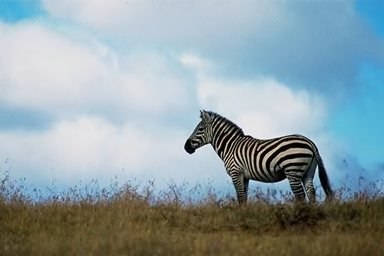

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
Image.open(real_image_path)


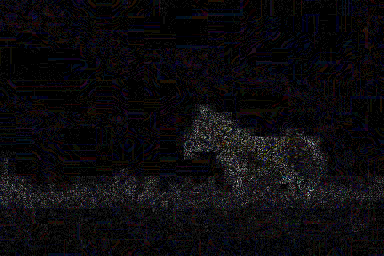

In [ ]:
convert_to_ela_image(real_image_path, 90)

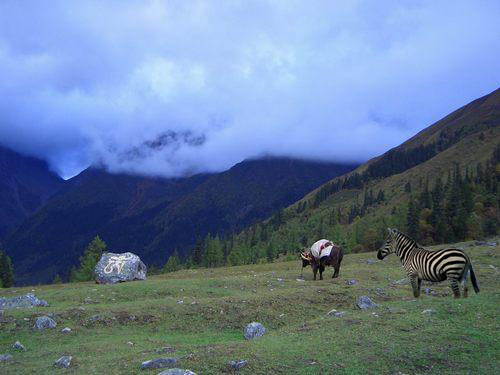

In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
Image.open(fake_image_path)

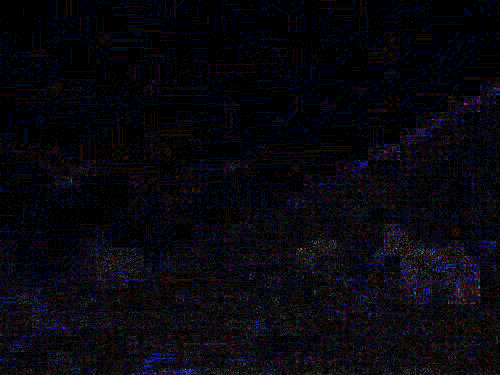

In [ ]:
convert_to_ela_image(fake_image_path, 90)

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0


In [ ]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

Au => Total Images 7354, Take 2100 random images from the list Tp => Total Images 2064

In [ ]:
import random
path = '/content/drive/MyDrive/image dataset/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 100 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 100 images
Processing 200 images
Processing 300 images
Processing 400 images
Processing 500 images
Processing 600 images
Processing 700 images
Processing 800 images
Processing 900 images
Processing 1000 images
Processing 1100 images
Processing 1200 images
Processing 1300 images
Processing 1400 images
Processing 1500 images
Processing 1600 images
Processing 1700 images
Processing 1800 images
Processing 1900 images
Processing 2000 images
Processing 2100 images
Processing 2200 images
Processing 2300 images
Processing 2400 images
Processing 2500 images
Processing 2600 images
Processing 2700 images
Processing 2800 images
Processing 2900 images
Processing 3000 images
Processing 3100 images
Processing 3200 images
Processing 3300 images
Processing 3400 images
Processing 3500 images
Processing 3600 images
Processing 3700 images
Processing 3800 images
Processing 3900 images
Processing 4000 images
Processing 4100 images
Processing 4200 images
Processing 4300 images
Processing 4400 imag

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 6800 images
Processing 6900 images
Processing 7000 images
Processing 7100 images
Processing 7200 images
Processing 7300 images
Processing 7400 images
2100 2100


In [ ]:
for x in range(1,11):
  path = f'/content/drive/MyDrive/image dataset/Tp{x}'
  for dirname, _, filenames in os.walk(path):
      for filename in filenames:
          if filename.endswith('jpg') or filename.endswith('png'):
              full_path = os.path.join(dirname, filename)
              X.append(prepare_image(full_path))
              Y.append(0)
              if len(Y) % 10 == 0:
                  print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2110 images
Processing 2120 images
Processing 2130 images
Processing 2140 images
Processing 2150 images
Processing 2160 images
Processing 2170 images
Processing 2180 images
Processing 2190 images
Processing 2200 images
Processing 2210 images
Processing 2220 images
Processing 2230 images
Processing 2240 images
Processing 2250 images
Processing 2260 images
Processing 2270 images
Processing 2280 images
Processing 2290 images
Processing 2300 images
Processing 2310 images
Processing 2320 images
Processing 2330 images
Processing 2340 images
Processing 2350 images
Processing 2360 images
Processing 2370 images
Processing 2380 images
Processing 2390 images
Processing 2400 images
Processing 2410 images
Processing 2420 images
Processing 2430 images
Processing 2440 images
Processing 2450 images
Processing 2460 images
Processing 2470 images
Processing 2480 images
Processing 2490 images
Processing 2500 images
Processing 2510 images
Processing 2520 images
Processing 2530 images
Processing 

In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
105/105 [==============================] - 323s 3s/step - loss: 0.1409 - accuracy: 0.9434 - val_loss: 0.2068 - val_accuracy: 0.9196
Epoch 2/10
105/105 [==============================] - 322s 3s/step - loss: 0.1451 - accuracy: 0.9482 - val_loss: 0.1984 - val_accuracy: 0.9268
Epoch 3/10
105/105 [==============================] - 343s 3s/step - loss: 0.1313 - accuracy: 0.9534 - val_loss: 0.2014 - val_accuracy: 0.9292
Epoch 4/10
105/105 [==============================] - 335s 3s/step - loss: 0.1363 - accuracy: 0.9448 - val_loss: 0.2475 - val_accuracy: 0.9172
Epoch 5/10
105/105 [==============================] - 324s 3s/step - loss: 0.1201 - accuracy: 0.9519 - val_loss: 0.2110 - val_accuracy: 0.9292
Epoch 6/10
105/105 [==============================] - 325s 3s/step - loss: 0.1137 - accuracy: 0.9555 - val_loss: 0.1951 - val_accuracy: 0.9292
Epoch 7/10
105/105 [==============================] - 325s 3s/step - loss: 0.1039 - accuracy: 0.9558 - val_loss: 0.1935 - val_accuracy: 0.9256

In [ ]:
model.save('model_casia_run1.h5')

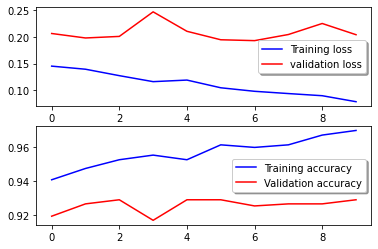

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 100.00


In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 99.58


In [ ]:
for x in range(1,11):
  fake_image = os.listdir(f'/content/drive/MyDrive/image dataset/Tp{x}')
  print(str(x) + "hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm")
  correct = 0
  total = 0
  for file_name in fake_image:
      if file_name.endswith('jpg') or filename.endswith('png'):
          fake_image_path = os.path.join(f'/content/drive/MyDrive/image dataset/Tp{x}', file_name)
          image = prepare_image(fake_image_path)
          image = image.reshape(-1, 128, 128, 3)
          y_pred = model.predict(image)
          y_pred_class = np.argmax(y_pred, axis = 1)[0]
          total += 1
          if y_pred_class == 0:
              correct += 1
              print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
Class: fake Confidence: 100.00
Class: fake Confidence: 99.25
Class: fake Confidence: 100.00
Class: fake Confidence: 100.00
Class: fake Confidence: 99.98
Class: fake Confidence: 98.14
Class: fake Confidence: 100.00
Class: fake Confidence: 99.99
Class: fake Confidence: 99.99
Class: fake Confidence: 99.91
Class: fake Confidence: 99.90
Class: fake Confidence: 100.00
Class: fake Confidence: 99.77
Class: fake Confidence: 100.00
Class: fake Confidence: 100.00
Class: fake Confidence: 99.99
Class: fake Confidence: 99.54
Class: fake Confidence: 99.94
Class: fake Confidence: 100.00
Class: fake Confidence: 99.60
Class: fake Confidence: 100.00
Class: fake Confidence: 100.00
Class: fake Confidence: 99.79
Class: fake Confidence: 99.99
Class: fake Confidence: 99.99
Class: fake Confidence: 99.99
Class: fake Confidence: 97.64
Class: fake Confidence: 94.49
Class: fake Confidence: 99.61
Class: fake Confidence: 100.00
Class: fake Confidence: 99.87

In [ ]:
real_image = os.listdir('/content/drive/MyDrive/image dataset/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/image dataset/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: r

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7437, Correct: 6711, Acc: 90.23799919322308
Total: 7449, Correct: 6723, Acc: 90.25372533225936



5000 images <br>
Authentic : 60% ,3000 images<br>
Tempered : 40%, 2000 images<br>


In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
Xtest6040 = [] # ELA converted images
Ytest6040 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/image dataset/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            Xtest6040.append(prepare_image(full_path))
            Ytest6040.append(1)
            if len(Ytest6040) % 10 == 0:
                print(f'Processing {len(Ytest6040)} images')

random.shuffle(Xtest6040)
Xtest6040 = Xtest6040[:3000]
Ytest6040 = Ytest6040[:3000]
print(len(Xtest6040), len(Ytest6040))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 imag

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 6800 images
Processing 6810 images
Processing 6820 images
Processing 6830 images
Processing 6840 images
Processing 6850 images
Processing 6860 images
Processing 6870 images
Processing 6880 images
Processing 6890 images
Processing 6900 images
Processing 6910 images
Processing 6920 images
Processing 6930 images
Processing 6940 images
Processing 6950 images
Processing 6960 images
Processing 6970 images
Processing 6980 images
Processing 6990 images
Processing 7000 images
Processing 7010 images
Processing 7020 images
Processing 7030 images
Processing 7040 images
Processing 7050 images
Processing 7060 images
Processing 7070 images
Processing 7080 images
Processing 7090 images
Processing 7100 images
Processing 7110 images
Processing 7120 images
Processing 7130 images
Processing 7140 images
Processing 7150 images
Processing 7160 images
Processing 7170 images
Processing 7180 images
Processing 7190 images
Processing 7200 images
Processing 7210 images
Processing 7220 images
Processing 

In [ ]:
for x in range(0,11):
  if len(Ytest6040)  == 5000:
      break
  path = f'/content/drive/MyDrive/image dataset/Tp{x}'
  for dirname, _, filenames in os.walk(path):
      if len(Ytest6040)  == 5000:
          break
      for filename in filenames:
          if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
              full_path = os.path.join(dirname, filename)
              Xtest6040.append(prepare_image(full_path))
              Ytest6040.append(0)
              if len(Ytest6040) % 10 == 0:
                  print(f'Processing {len(Ytest6040)} images')
              if len(Ytest6040)  == 5000:
                  break

print(len(Xtest6040), len(Ytest6040))

Processing 3010 images
Processing 3020 images
Processing 3030 images
Processing 3040 images
Processing 3050 images
Processing 3060 images
Processing 3070 images
Processing 3080 images
Processing 3090 images
Processing 3100 images
Processing 3110 images
Processing 3120 images
Processing 3130 images
Processing 3140 images
Processing 3150 images
Processing 3160 images
Processing 3170 images
Processing 3180 images
Processing 3190 images
Processing 3200 images
Processing 3210 images
Processing 3220 images
Processing 3230 images
Processing 3240 images
Processing 3250 images
Processing 3260 images
Processing 3270 images
Processing 3280 images
Processing 3290 images
Processing 3300 images
Processing 3310 images
Processing 3320 images
Processing 3330 images
Processing 3340 images
Processing 3350 images
Processing 3360 images
Processing 3370 images
Processing 3380 images
Processing 3390 images
Processing 3400 images
Processing 3410 images
Processing 3420 images
Processing 3430 images
Processing 

In [ ]:
Xtest6040 = np.array(Xtest6040)
Ytest6040 = to_categorical(Ytest6040, 2)
Xtest6040 = Xtest6040.reshape(-1, 128, 128, 3)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(Xtest6040, Ytest6040, test_size = 0.2, random_state=5)
Xtest6040 = Xtest6040.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

4000 4000
1000 1000


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
125/125 [==============================] - 387s 3s/step - loss: 0.5921 - accuracy: 0.6321 - val_loss: 0.3696 - val_accuracy: 0.8780
Epoch 2/10
125/125 [==============================] - 391s 3s/step - loss: 0.3515 - accuracy: 0.8688 - val_loss: 0.3228 - val_accuracy: 0.8800
Epoch 3/10
125/125 [==============================] - 386s 3s/step - loss: 0.3151 - accuracy: 0.8831 - val_loss: 0.2889 - val_accuracy: 0.8840
Epoch 4/10
125/125 [==============================] - 383s 3s/step - loss: 0.3055 - accuracy: 0.8874 - val_loss: 0.2656 - val_accuracy: 0.9040
Epoch 5/10
125/125 [==============================] - 382s 3s/step - loss: 0.2587 - accuracy: 0.9022 - val_loss: 0.2673 - val_accuracy: 0.8910
Epoch 6/10
125/125 [==============================] - 382s 3s/step - loss: 0.2482 - accuracy: 0.9087 - val_loss: 0.2473 - val_accuracy: 0.9050
Epoch 7/10
125/125 [==============================] - 383s 3s/step - loss: 0.2532 - accuracy: 0.9092 - val_loss: 0.2574 - val_accuracy: 0.8890

In [ ]:
model.save('model_casia_run1.h5')

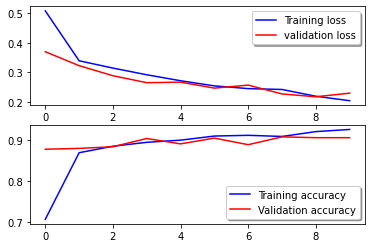

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

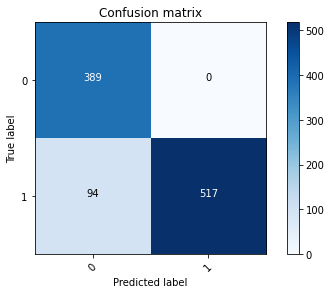

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 99.98


In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 98.16


In [ ]:
for x in range(0,11):
  fake_image = os.listdir(f'/content/drive/MyDrive/image dataset/Tp{x}')
  print(str(x) + "hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm")
  correct = 0
  total = 0
  for file_name in fake_image:
      if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
          fake_image_path = os.path.join(f'/content/drive/MyDrive/image dataset/Tp{x}', file_name)
          image = prepare_image(fake_image_path)
          image = image.reshape(-1, 128, 128, 3)
          y_pred = model.predict(image)
          y_pred_class = np.argmax(y_pred, axis = 1)[0]
          total += 1
          if y_pred_class == 0:
              correct += 1
              print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

0hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
Class: fake Confidence: 99.76
Class: fake Confidence: 99.39
Class: fake Confidence: 96.71
Class: fake Confidence: 99.21
Class: fake Confidence: 97.81
Class: fake Confidence: 97.39
Class: fake Confidence: 99.06
Class: fake Confidence: 96.31
Class: fake Confidence: 99.60
Class: fake Confidence: 98.37
Class: fake Confidence: 98.83
Class: fake Confidence: 94.34
Class: fake Confidence: 98.30
Class: fake Confidence: 99.38
Class: fake Confidence: 98.46
Class: fake Confidence: 96.96
Class: fake Confidence: 96.09
Class: fake Confidence: 93.07
Class: fake Confidence: 98.39
Class: fake Confidence: 98.40
Class: fake Confidence: 98.75
Class: fake Confidence: 99.52
Class: fake Confidence: 99.14
Class: fake Confidence: 97.14
Class: fake Confidence: 97.03
Class: fake Confidence: 98.07
Class: fake Confidence: 98.06
Class: fake Confidence: 99.06
Class: fake Confidence: 99.10
Class: fake Confidence: 99.33
Class: fake Confidence: 96.50
Class: fak

In [ ]:
real_image = os.listdir('/content/drive/MyDrive/image dataset/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/image dataset/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: real Confidence: 99.99
Class: real Confidence: 99.97
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.93
Class: real Confidence: 99.98
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.98
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.94
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 54.74
Class: real Confidence: 84.72
Class: real Confidence: 99.88
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 93.70
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 65.95
Class: real Confidence: 100.00
Class: real Confidence: 99.86
Class: 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 100.00
Class: real Confidence: 82.21
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.96
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.87
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.93
Class: real Confidence: 100.00
Class: real Confidence: 84.46
Class: real Confidence: 100.00
Class: real Confidence: 98.47
Class: real Confidence: 99.84
Class: real Confide

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7437, Correct: 6365, Acc: 85.58558558558559
Total: 14886, Correct: 12742, Acc: 85.59720542791885


5000 images <br>
Authentic : 70%,3500 images<br>
Tempered:30%, 1500 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image



In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

Xtest7030 = [] # ELA converted images
Ytest7030 = [] # 0 for fake, 1 for real

In [ ]:

import random
path = '/content/drive/MyDrive/image dataset/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            Xtest7030.append(prepare_image(full_path))
            Ytest7030.append(1)
            if len(Ytest7030) % 10 == 0:
                print(f'Processing {len(Ytest7030)} images')

random.shuffle(Xtest7030)
Xtest7030 = Xtest7030[:3500]
Ytest7030 = Ytest7030[:3500]
print(len(Xtest7030), len(Ytest7030))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 imag

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 6800 images
Processing 6810 images
Processing 6820 images
Processing 6830 images
Processing 6840 images
Processing 6850 images
Processing 6860 images
Processing 6870 images
Processing 6880 images
Processing 6890 images
Processing 6900 images
Processing 6910 images
Processing 6920 images
Processing 6930 images
Processing 6940 images
Processing 6950 images
Processing 6960 images
Processing 6970 images
Processing 6980 images
Processing 6990 images
Processing 7000 images
Processing 7010 images
Processing 7020 images
Processing 7030 images
Processing 7040 images
Processing 7050 images
Processing 7060 images
Processing 7070 images
Processing 7080 images
Processing 7090 images
Processing 7100 images
Processing 7110 images
Processing 7120 images
Processing 7130 images
Processing 7140 images
Processing 7150 images
Processing 7160 images
Processing 7170 images
Processing 7180 images
Processing 7190 images
Processing 7200 images
Processing 7210 images
Processing 7220 images
Processing 

In [ ]:
for x in range(0,11):
  if len(Ytest7030)  == 5000:
      break
  path = f'/content/drive/MyDrive/image dataset/Tp{x}'
  for dirname, _, filenames in os.walk(path):
      if len(Ytest7030)  == 5000:
          break
      for filename in filenames:
          if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
              full_path = os.path.join(dirname, filename)
              Xtest7030.append(prepare_image(full_path))
              Ytest7030.append(0)
              if len(Ytest7030) % 10 == 0:
                  print(f'Processing {len(Ytest7030)} images')
              if len(Ytest7030)  == 5000:
                  break

print(len(Xtest7030), len(Ytest7030))

Processing 3510 images
Processing 3520 images
Processing 3530 images
Processing 3540 images
Processing 3550 images
Processing 3560 images
Processing 3570 images
Processing 3580 images
Processing 3590 images
Processing 3600 images
Processing 3610 images
Processing 3620 images
Processing 3630 images
Processing 3640 images
Processing 3650 images
Processing 3660 images
Processing 3670 images
Processing 3680 images
Processing 3690 images
Processing 3700 images
Processing 3710 images
Processing 3720 images
Processing 3730 images
Processing 3740 images
Processing 3750 images
Processing 3760 images
Processing 3770 images
Processing 3780 images
Processing 3790 images
Processing 3800 images
Processing 3810 images
Processing 3820 images
Processing 3830 images
Processing 3840 images
Processing 3850 images
Processing 3860 images
Processing 3870 images
Processing 3880 images
Processing 3890 images
Processing 3900 images
Processing 3910 images
Processing 3920 images
Processing 3930 images
Processing 

In [ ]:
Xtest7030 = np.array(Xtest7030)
Ytest7030 = to_categorical(Ytest7030, 2)
Xtest7030 = Xtest7030.reshape(-1, 128, 128, 3)

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(Xtest7030, Ytest7030, test_size = 0.2, random_state=5)
Xtest7030 = Xtest7030.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

4000 4000
1000 1000


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
epochs = 10
batch_size = 32

In [ ]:

init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])



Epoch 1/10
125/125 [==============================] - 331s 3s/step - loss: 0.5457 - accuracy: 0.7001 - val_loss: 0.3656 - val_accuracy: 0.8170
Epoch 2/10
125/125 [==============================] - 326s 3s/step - loss: 0.3565 - accuracy: 0.8377 - val_loss: 0.3420 - val_accuracy: 0.8580
Epoch 3/10
125/125 [==============================] - 328s 3s/step - loss: 0.3131 - accuracy: 0.8686 - val_loss: 0.3086 - val_accuracy: 0.8760
Epoch 4/10
125/125 [==============================] - 325s 3s/step - loss: 0.2980 - accuracy: 0.8713 - val_loss: 0.3122 - val_accuracy: 0.8730
Epoch 5/10
125/125 [==============================] - 329s 3s/step - loss: 0.2821 - accuracy: 0.8766 - val_loss: 0.2872 - val_accuracy: 0.8810
Epoch 6/10
125/125 [==============================] - 338s 3s/step - loss: 0.2858 - accuracy: 0.8654 - val_loss: 0.3248 - val_accuracy: 0.8610
Epoch 7/10
125/125 [==============================] - 348s 3s/step - loss: 0.2593 - accuracy: 0.8925 - val_loss: 0.2680 - val_accuracy: 0.8910

In [ ]:
model.save('model_casia_run1.h5')

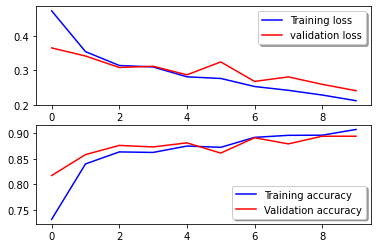

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



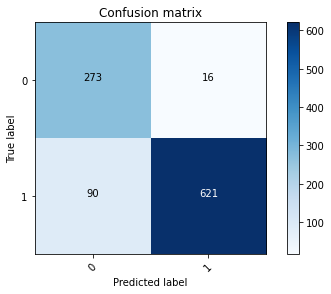

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 100.00


In [ ]:
for x in range(0,11):
  fake_image = os.listdir(f'/content/drive/MyDrive/image dataset/Tp{x}')
  print(str(x) + "hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm")
  correct = 0
  total = 0
  for file_name in fake_image:
      if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
          fake_image_path = os.path.join(f'/content/drive/MyDrive/image dataset/Tp{x}', file_name)
          image = prepare_image(fake_image_path)
          image = image.reshape(-1, 128, 128, 3)
          y_pred = model.predict(image)
          y_pred_class = np.argmax(y_pred, axis = 1)[0]
          total += 1
          if y_pred_class == 0:
              correct += 1
              print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

0hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
Class: fake Confidence: 77.39
Class: fake Confidence: 97.40
Class: fake Confidence: 86.86
Class: fake Confidence: 86.81
Class: fake Confidence: 93.42
Class: fake Confidence: 67.59
Class: fake Confidence: 97.47
Class: fake Confidence: 90.67
Class: fake Confidence: 93.50
Class: fake Confidence: 96.82
Class: fake Confidence: 92.97
Class: fake Confidence: 99.23
1hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
Class: fake Confidence: 80.48
Class: fake Confidence: 98.56
Class: fake Confidence: 89.84
Class: fake Confidence: 95.61
Class: fake Confidence: 84.53
Class: fake Confidence: 90.23
Class: fake Confidence: 96.40
Class: fake Confidence: 96.22
Class: fake Confidence: 90.36
Class: fake Confidence: 93.71
Class: fake Confidence: 96.25
Class: fake Confidence: 93.08
Class: fake Confidence: 96.19
Class: fake Confidence: 90.76
Class: fake Confidence: 84.49
Class: fake Confidence: 76.21
Class: fake Confidence: 79.91
Class: fak

In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 86.62


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/image dataset/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/image dataset/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.99
Class: real Confidence: 99.92
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.44
Class: real Confidence: 100.00
Class: real Confidence: 99.68
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.97
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 1

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 100.00
Class: real Confidence: 99.27
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.73
Class: real Confidence: 99.52
Class: real Confidence: 100.00
Class: real Confidence: 99.78
Class: real Confidence: 100.00
Class: real Confidence: 99.97
Class: real Confidence: 99.95
Class: real Confide

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7437, Correct: 6466, Acc: 86.94366007798844
Total: 7802, Correct: 6827, Acc: 87.50320430658806


5000 images
Authentic : 40%, 2000 images
Tempered : 60%, 3000 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image



In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

Xtest4060 = [] # ELA converted images
Ytest4060 = [] # 0 for fake, 1 for real

In [ ]:

import random
path = '/content/drive/MyDrive/image dataset/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            Xtest4060.append(prepare_image(full_path))
            Ytest4060.append(1)
            if len(Ytest4060) % 10 == 0:
                print(f'Processing {len(Ytest4060)} images')

random.shuffle(Xtest4060)
Xtest4060 = Xtest4060[:2000]
Ytest4060 = Ytest4060[:2000]
print(len(Xtest4060), len(Ytest4060))

Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 ima

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 6810 images
Processing 6820 images
Processing 6830 images
Processing 6840 images
Processing 6850 images
Processing 6860 images
Processing 6870 images
Processing 6880 images
Processing 6890 images
Processing 6900 images
Processing 6910 images
Processing 6920 images
Processing 6930 images
Processing 6940 images
Processing 6950 images
Processing 6960 images
Processing 6970 images
Processing 6980 images
Processing 6990 images
Processing 7000 images
Processing 7010 images
Processing 7020 images
Processing 7030 images
Processing 7040 images
Processing 7050 images
Processing 7060 images
Processing 7070 images
Processing 7080 images
Processing 7090 images
Processing 7100 images
Processing 7110 images
Processing 7120 images
Processing 7130 images
Processing 7140 images
Processing 7150 images
Processing 7160 images
Processing 7170 images
Processing 7180 images
Processing 7190 images
Processing 7200 images
Processing 7210 images
Processing 7220 images
Processing 7230 images
Processing 

In [ ]:
for x in range(0,11):
  if len(Ytest4060)  == 5000:
      break
  path = f'/content/drive/MyDrive/image dataset/Tp{x}'
  for dirname, _, filenames in os.walk(path):
      if len(Ytest4060)  == 5000:
          break
      for filename in filenames:
          if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
              full_path = os.path.join(dirname, filename)
              Xtest4060.append(prepare_image(full_path))
              Ytest4060.append(0)
              if len(Ytest4060) % 10 == 0:
                  print(f'Processing {len(Ytest4060)} images')
              if len(Ytest4060)  == 5000:
                  break

print(len(Xtest4060), len(Ytest4060))

Processing 2010 images
Processing 2020 images
Processing 2030 images
Processing 2040 images
Processing 2050 images
Processing 2060 images
Processing 2070 images
Processing 2080 images
Processing 2090 images
Processing 2100 images
Processing 2110 images
Processing 2120 images
Processing 2130 images
Processing 2140 images
Processing 2150 images
Processing 2160 images
Processing 2170 images
Processing 2180 images
Processing 2190 images
Processing 2200 images
Processing 2210 images
Processing 2220 images
Processing 2230 images
Processing 2240 images
Processing 2250 images
Processing 2260 images
Processing 2270 images
Processing 2280 images
Processing 2290 images
Processing 2300 images
Processing 2310 images
Processing 2320 images
Processing 2330 images
Processing 2340 images
Processing 2350 images
Processing 2360 images
Processing 2370 images
Processing 2380 images
Processing 2390 images
Processing 2400 images
Processing 2410 images
Processing 2420 images
Processing 2430 images
Processing 

In [ ]:
Xtest4060 = np.array(Xtest4060)
Ytest4060 = to_categorical(Ytest4060, 2)
Xtest4060 = Xtest4060.reshape(-1, 128, 128, 3)

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(Xtest4060, Ytest4060, test_size = 0.2, random_state=5)
Xtest4060 = Xtest4060.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

4000 4000
1000 1000


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:

init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])


Epoch 1/10
125/125 [==============================] - 350s 3s/step - loss: 0.5840 - accuracy: 0.6961 - val_loss: 0.3754 - val_accuracy: 0.8740
Epoch 2/10
125/125 [==============================] - 347s 3s/step - loss: 0.3400 - accuracy: 0.8862 - val_loss: 0.3410 - val_accuracy: 0.8820
Epoch 3/10
125/125 [==============================] - 348s 3s/step - loss: 0.3334 - accuracy: 0.8795 - val_loss: 0.3161 - val_accuracy: 0.8900
Epoch 4/10
125/125 [==============================] - 347s 3s/step - loss: 0.2881 - accuracy: 0.9038 - val_loss: 0.3522 - val_accuracy: 0.8680
Epoch 5/10
125/125 [==============================] - 344s 3s/step - loss: 0.2797 - accuracy: 0.9054 - val_loss: 0.2624 - val_accuracy: 0.9110
Epoch 6/10
125/125 [==============================] - 341s 3s/step - loss: 0.2352 - accuracy: 0.9222 - val_loss: 0.2494 - val_accuracy: 0.9120
Epoch 7/10
125/125 [==============================] - 343s 3s/step - loss: 0.2101 - accuracy: 0.9291 - val_loss: 0.2489 - val_accuracy: 0.9150

In [ ]:
model.save('model_casia_run1.h5')

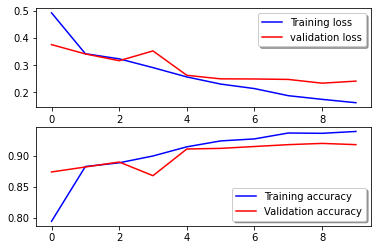

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



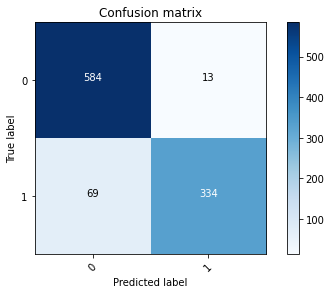

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 100.00


In [ ]:
for x in range(0,11):
  fake_image = os.listdir(f'/content/drive/MyDrive/image dataset/Tp{x}')
  print(str(x) + "hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm")
  correct = 0
  total = 0
  for file_name in fake_image:
      if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
          fake_image_path = os.path.join(f'/content/drive/MyDrive/image dataset/Tp{x}', file_name)
          image = prepare_image(fake_image_path)
          image = image.reshape(-1, 128, 128, 3)
          y_pred = model.predict(image)
          y_pred_class = np.argmax(y_pred, axis = 1)[0]
          total += 1
          if y_pred_class == 0:
              correct += 1
              print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: fake Confidence: 99.10
Class: fake Confidence: 98.37
Class: fake Confidence: 99.92
Class: fake Confidence: 98.44
Class: fake Confidence: 98.39
Class: fake Confidence: 99.94
Class: fake Confidence: 99.97
Class: fake Confidence: 99.97
Class: fake Confidence: 99.99
Class: fake Confidence: 99.86
Class: fake Confidence: 99.66
Class: fake Confidence: 99.19
Class: fake Confidence: 99.95
Class: fake Confidence: 99.69
Class: fake Confidence: 99.90
Class: fake Confidence: 99.97
Class: fake Confidence: 99.92
Class: fake Confidence: 98.56
Class: fake Confidence: 99.86
Class: fake Confidence: 99.26
Class: fake Confidence: 100.00
Class: fake Confidence: 99.82
Class: fake Confidence: 99.84
Class: fake Confidence: 99.96
Class: fake Confidence: 99.99
Class: fake Confidence: 99.96
Class: fake Confidence: 99.98
Class: fake Confidence: 99.95
Class: fake Confidence: 99.96
Class: fake Confidence: 100.00
Class: fake Confidence: 99.95
Class: fake Confi

In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 99.71


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/image dataset/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/image dataset/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: real Confidence: 99.66
Class: real Confidence: 99.93
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.46
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.83
Class: real Confidence: 99.99
Class: real Confidence: 64.73
Class: real Confidence: 100.

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 100.00
Class: real Confidence: 94.37
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.94
Class: real Confidence: 100.00
Class: real Confidence: 99.95
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 99.65
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 98.99
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 99.99
Class: real Confiden

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7437, Correct: 6370, Acc: 85.65281699610058
Total: 8135, Correct: 7061, Acc: 86.79778733866011


5000 images <br>
Authentic : 30%, 1500 images<br>
Tempered : 70%, 3500 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image



In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

Xtest3070 = [] # ELA converted images
Ytest3070 = [] # 0 for fake, 1 for real

In [ ]:

import random
path = '/content/drive/MyDrive/image dataset/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            Xtest3070.append(prepare_image(full_path))
            Ytest3070.append(1)
            if len(Ytest3070) % 10 == 0:
                print(f'Processing {len(Ytest3070)} images')

random.shuffle(Xtest3070)
Xtest3070 = Xtest3070[:1500]
Ytest3070 = Ytest3070[:1500]
print(len(Xtest3070), len(Ytest3070))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 imag

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 6800 images
Processing 6810 images
Processing 6820 images
Processing 6830 images
Processing 6840 images
Processing 6850 images
Processing 6860 images
Processing 6870 images
Processing 6880 images
Processing 6890 images
Processing 6900 images
Processing 6910 images
Processing 6920 images
Processing 6930 images
Processing 6940 images
Processing 6950 images
Processing 6960 images
Processing 6970 images
Processing 6980 images
Processing 6990 images
Processing 7000 images
Processing 7010 images
Processing 7020 images
Processing 7030 images
Processing 7040 images
Processing 7050 images
Processing 7060 images
Processing 7070 images
Processing 7080 images
Processing 7090 images
Processing 7100 images
Processing 7110 images
Processing 7120 images
Processing 7130 images
Processing 7140 images
Processing 7150 images
Processing 7160 images
Processing 7170 images
Processing 7180 images
Processing 7190 images
Processing 7200 images
Processing 7210 images
Processing 7220 images
Processing 

In [ ]:
for x in range(0,11):
  if len(Ytest3070)  == 5000:
      break
  path = f'/content/drive/MyDrive/image dataset/Tp{x}'
  for dirname, _, filenames in os.walk(path):
      if len(Ytest3070)  == 5000:
          break
      for filename in filenames:
          if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
              full_path = os.path.join(dirname, filename)
              Xtest3070.append(prepare_image(full_path))
              Ytest3070.append(0)
              if len(Ytest3070) % 10 == 0:
                  print(f'Processing {len(Ytest3070)} images')
              if len(Ytest3070)  == 5000:
                  break

print(len(Xtest3070), len(Ytest3070))

Processing 1510 images
Processing 1520 images
Processing 1530 images
Processing 1540 images
Processing 1550 images
Processing 1560 images
Processing 1570 images
Processing 1580 images
Processing 1590 images
Processing 1600 images
Processing 1610 images
Processing 1620 images
Processing 1630 images
Processing 1640 images
Processing 1650 images
Processing 1660 images
Processing 1670 images
Processing 1680 images
Processing 1690 images
Processing 1700 images
Processing 1710 images
Processing 1720 images
Processing 1730 images
Processing 1740 images
Processing 1750 images
Processing 1760 images
Processing 1770 images
Processing 1780 images
Processing 1790 images
Processing 1800 images
Processing 1810 images
Processing 1820 images
Processing 1830 images
Processing 1840 images
Processing 1850 images
Processing 1860 images
Processing 1870 images
Processing 1880 images
Processing 1890 images
Processing 1900 images
Processing 1910 images
Processing 1920 images
Processing 1930 images
Processing 

In [ ]:
Xtest3070 = np.array(Xtest3070)
Ytest3070 = to_categorical(Ytest3070, 2)
Xtest3070 = Xtest3070.reshape(-1, 128, 128, 3)

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(Xtest3070, Ytest3070, test_size = 0.2, random_state=5)
Xtest3070 = Xtest3070.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

4000 4000
1000 1000


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:

init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])


Epoch 1/10
125/125 [==============================] - 357s 3s/step - loss: 0.5527 - accuracy: 0.7537 - val_loss: 0.3711 - val_accuracy: 0.8720
Epoch 2/10
125/125 [==============================] - 351s 3s/step - loss: 0.3217 - accuracy: 0.9037 - val_loss: 0.2948 - val_accuracy: 0.9000
Epoch 3/10
125/125 [==============================] - 351s 3s/step - loss: 0.2947 - accuracy: 0.9076 - val_loss: 0.2810 - val_accuracy: 0.9080
Epoch 4/10
125/125 [==============================] - 351s 3s/step - loss: 0.2664 - accuracy: 0.9189 - val_loss: 0.2732 - val_accuracy: 0.9120
Epoch 5/10
125/125 [==============================] - 351s 3s/step - loss: 0.2533 - accuracy: 0.9239 - val_loss: 0.2602 - val_accuracy: 0.9130
Epoch 6/10
125/125 [==============================] - 350s 3s/step - loss: 0.2225 - accuracy: 0.9314 - val_loss: 0.2335 - val_accuracy: 0.9270
Epoch 7/10
125/125 [==============================] - 354s 3s/step - loss: 0.1969 - accuracy: 0.9428 - val_loss: 0.2261 - val_accuracy: 0.9290

In [ ]:
model.save('model_casia_run1.h5')

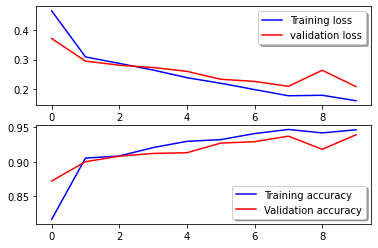

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



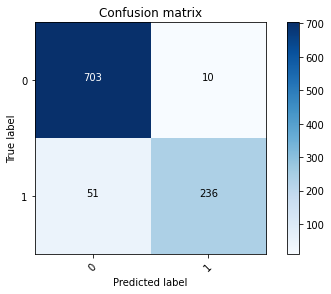

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/image dataset/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 97.93


In [ ]:
for x in range(0,11):
  fake_image = os.listdir(f'/content/drive/MyDrive/image dataset/Tp{x}')
  print(str(x) + "hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm")
  correct = 0
  total = 0
  for file_name in fake_image:
      if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
          fake_image_path = os.path.join(f'/content/drive/MyDrive/image dataset/Tp{x}', file_name)
          image = prepare_image(fake_image_path)
          image = image.reshape(-1, 128, 128, 3)
          y_pred = model.predict(image)
          y_pred_class = np.argmax(y_pred, axis = 1)[0]
          total += 1
          if y_pred_class == 0:
              correct += 1
              print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: fake Confidence: 99.12
Class: fake Confidence: 97.81
Class: fake Confidence: 98.86
Class: fake Confidence: 99.89
Class: fake Confidence: 99.87
Class: fake Confidence: 98.44
Class: fake Confidence: 98.85
Class: fake Confidence: 99.59
Class: fake Confidence: 96.40
Class: fake Confidence: 98.18
Class: fake Confidence: 97.37
Class: fake Confidence: 99.20
Class: fake Confidence: 97.72
Class: fake Confidence: 97.60
Class: fake Confidence: 99.83
Class: fake Confidence: 98.26
Class: fake Confidence: 100.00
Class: fake Confidence: 99.97
Class: fake Confidence: 99.08
Class: fake Confidence: 99.91
Class: fake Confidence: 99.36
Class: fake Confidence: 97.59
Class: fake Confidence: 99.97
Class: fake Confidence: 100.00
Class: fake Confidence: 99.64
Class: fake Confidence: 89.83
Class: fake Confidence: 99.99
Class: fake Confidence: 99.35
Class: fake Confidence: 99.93
Class: fake Confidence: 99.99
Class: fake Confidence: 99.62
Class: fake Confi

In [ ]:
fake_image_path = '/content/drive/MyDrive/image dataset/Tp3/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 99.31


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/image dataset/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/image dataset/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Streaming output truncated to the last 5000 lines.
Class: real Confidence: 99.89
Class: real Confidence: 100.00
Class: real Confidence: 95.57
Class: real Confidence: 99.87
Class: real Confidence: 100.00
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 99.94
Class: real Confidence: 99.95
Class: real Confidence: 93.97
Class: real Confidence: 100.00
Class: real Confidence: 98.15
Class: real Confidence: 99.59
Class: real Confidence: 100.00
Class: real Confidence: 98.48
Class: real Confidence: 99.94
Class: real Confidence: 99.88
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 99.94
Class: real Confidence: 99.98
Class: real Confidence: 99.99
Class: real Confidence: 98.61
Class: real Confidence: 99.98
Class: real Confidence: 99.98
Class: real Confidence: 100.00
Class: real Confidence: 99.89
Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 97.70
Class: real Confidence: 99.85
Class: real

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 99.99
Class: real Confidence: 100.00
Class: real Confidence: 99.95
Class: real Confidence: 99.99
Class: real Confidence: 99.97
Class: real Confidence: 100.00
Class: real Confidence: 97.88
Class: real Confidence: 98.14
Class: real Confidence: 99.99
Class: real Confidence: 95.89
Class: real Confidence: 99.95
Class: real Confidence: 100.00
Class: real Confidence: 97.21
Class: real Confidence: 100.00
Class: real Confidence: 99.71
Class: real Confidence: 99.89
Class: real Confidence: 99.79
Class: real Confidence: 100.00
Class: real Confidence: 100.00
Class: real Confidence: 98.34
Class: real Confidence: 100.00
Class: real Confidence: 99.99
Class: real Confidence: 99.99
Class: real Confidence: 99.99
Class: real Confidence: 57.77
Class: real Confidence: 99.58
Class: real Confidence: 99.98
Class: real Confidence: 86.88
Class: real Confidence: 99.95
Class: real Confidence: 98.42
Class: real Confidence: 96.64
Class: real Confidence: 100.00
Class: real Confidence: 99.50
Cl

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7437, Correct: 6166, Acc: 82.90977544708889
Total: 8135, Correct: 6862, Acc: 84.35156730178242


Using NIST dataset

Total Images : 776 <br>
Authentic : 50% , 388 images <br>
Tempered : 50% , 388 images


In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X5050 = [] # ELA converted images
Y5050 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/NIST Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X5050.append(prepare_image(full_path))
            Y5050.append(1)
            if len(Y5050) % 10 == 0:
                print(f'Processing {len(Y5050)} images')

random.shuffle(X5050)

print(len(X5050), len(Y5050))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing

In [ ]:
import random
X5050 = X5050[:388]
Y5050 = Y5050[:388]

In [ ]:
path = '/content/drive/MyDrive/NIST Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y5050) == 776:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X5050.append(prepare_image(full_path))
            Y5050.append(0)
            if len(Y5050) % 10 == 0:
                print(f'Processing {len(Y5050)} images')

print(len(X5050), len(Y5050))

Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
776 776


In [ ]:
X5050 = np.array(X5050)
Y5050 = to_categorical(Y5050, 2)
X5050 = X5050.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X5050, Y5050, test_size = 0.2, random_state=5)
X5050 = X5050.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

620 620
156 156


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])


Epoch 1/10
20/20 [==============================] - 71s 3s/step - loss: 0.6920 - accuracy: 0.4423 - val_loss: 0.6814 - val_accuracy: 0.5128
Epoch 2/10
20/20 [==============================] - 61s 3s/step - loss: 0.6743 - accuracy: 0.5385 - val_loss: 0.6703 - val_accuracy: 0.5897
Epoch 3/10
20/20 [==============================] - 63s 3s/step - loss: 0.6399 - accuracy: 0.6979 - val_loss: 0.6907 - val_accuracy: 0.5641
Epoch 4/10
20/20 [==============================] - 63s 3s/step - loss: 0.6106 - accuracy: 0.6885 - val_loss: 0.6530 - val_accuracy: 0.6026
Epoch 5/10
20/20 [==============================] - 62s 3s/step - loss: 0.5927 - accuracy: 0.6989 - val_loss: 0.6376 - val_accuracy: 0.6090
Epoch 6/10
20/20 [==============================] - 61s 3s/step - loss: 0.5998 - accuracy: 0.6972 - val_loss: 0.6322 - val_accuracy: 0.6154
Epoch 7/10
20/20 [==============================] - 62s 3s/step - loss: 0.5696 - accuracy: 0.7362 - val_loss: 0.6395 - val_accuracy: 0.6474
Epoch 8/10
20/20 [==

In [ ]:
model.save('model_casia_run1.h5')

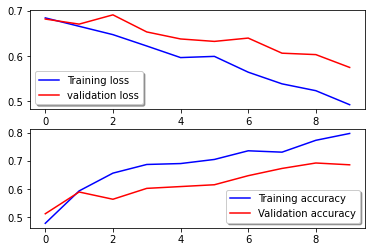

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


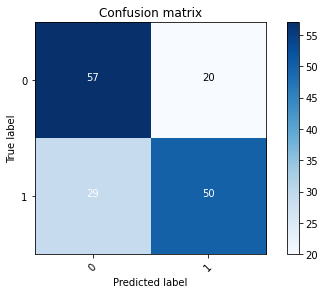

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/NIST Copy/Au/original_NC2016_0006.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 83.59


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/NIST Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/NIST Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 97.02
Class: fake Confidence: 97.00
Class: fake Confidence: 97.16
Class: fake Confidence: 90.31
Class: fake Confidence: 93.58
Class: fake Confidence: 64.62
Class: fake Confidence: 93.58
Class: fake Confidence: 91.00
Class: fake Confidence: 69.74
Class: fake Confidence: 69.74
Class: fake Confidence: 90.76
Class: fake Confidence: 73.32
Class: fake Confidence: 55.83
Class: fake Confidence: 80.94
Class: fake Confidence: 82.65
Class: fake Confidence: 97.97
Class: fake Confidence: 98.07
Class: fake Confidence: 85.47
Class: fake Confidence: 87.83
Class: fake Confidence: 96.93
Class: fake Confidence: 97.95
Class: fake Confidence: 83.58
Class: fake Confidence: 92.67
Class: fake Confidence: 81.47
Class: fake Confidence: 81.13
Class: fake Confidence: 91.71
Class: fake Confidence: 92.02
Class: fake Confidence: 93.74
Class: fake Confidence: 93.29
Class: fake Confidence: 73.15
Class: fake Confidence: 77.95
Class: fake Confidence: 90.98
Class: fake Confidence: 88.22
Class: fak

In [ ]:
fake_image_path = '/content/drive/MyDrive/NIST Copy/Tp/NC2016_0016.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 82.33


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/NIST Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/NIST Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 85.76
Class: real Confidence: 74.54
Class: real Confidence: 74.49
Class: real Confidence: 80.95
Class: real Confidence: 76.67
Class: real Confidence: 83.51
Class: real Confidence: 55.10
Class: real Confidence: 62.89
Class: real Confidence: 74.59
Class: real Confidence: 66.90
Class: real Confidence: 85.06
Class: real Confidence: 85.32
Class: real Confidence: 56.15
Class: real Confidence: 86.14
Class: real Confidence: 64.40
Class: real Confidence: 54.57
Class: real Confidence: 51.75
Class: real Confidence: 74.51
Class: real Confidence: 65.74
Class: real Confidence: 81.68
Class: real Confidence: 62.06
Class: real Confidence: 65.98
Class: real Confidence: 50.10
Class: real Confidence: 76.44
Class: real Confidence: 53.03
Class: real Confidence: 61.00
Class: real Confidence: 74.13
Class: real Confidence: 75.39
Class: real Confidence: 58.67
Class: real Confidence: 82.35
Class: real Confidence: 74.04
Class: real Confidence: 76.27
Class: real Confidence: 84.61
Class: rea

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 96.36
Class: real Confidence: 91.37
Class: real Confidence: 83.52
Class: real Confidence: 85.99
Class: real Confidence: 95.70
Class: real Confidence: 70.87
Class: real Confidence: 98.64
Class: real Confidence: 97.64
Class: real Confidence: 96.53
Class: real Confidence: 67.63
Class: real Confidence: 92.54
Class: real Confidence: 94.39
Class: real Confidence: 93.39
Class: real Confidence: 93.55
Class: real Confidence: 91.81
Class: real Confidence: 64.88
Class: real Confidence: 82.72
Class: real Confidence: 96.64
Class: real Confidence: 53.86
Class: real Confidence: 73.40
Class: real Confidence: 77.60
Class: real Confidence: 78.53
Class: real Confidence: 74.72
Class: real Confidence: 70.47
Class: real Confidence: 90.05
Class: real Confidence: 89.71
Class: real Confidence: 96.51
Class: real Confidence: 94.88
Class: real Confidence: 84.31
Class: real Confidence: 95.36
Class: real Confidence: 75.33
Class: real Confidence: 90.16
Class: real Confidence: 93.62
Class: rea

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 873, Correct: 611, Acc: 69.9885452462772
Total: 1261, Correct: 935, Acc: 74.14750198255354


Total Images : 900 <br>
Authentic : 60%,540 images<br>
Tempered : 40%,360 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X6040 = [] # ELA converted images
Y6040 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/NIST Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X6040.append(prepare_image(full_path))
            Y6040.append(1)
            if len(Y6040) % 10 == 0:
                print(f'Processing {len(Y6040)} images')

random.shuffle(X6040)

print(len(X6040), len(Y6040))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing

In [ ]:
import random
X6040 = X6040[:540]
Y6040 = Y6040[:540]

In [ ]:
path = '/content/drive/MyDrive/NIST Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y6040) == 900:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X6040.append(prepare_image(full_path))
            Y6040.append(0)
            if len(Y6040) % 10 == 0:
                print(f'Processing {len(Y6040)} images')

print(len(X6040), len(Y6040))

Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing 840 images
Processing 850 images
Processing 860 images
Processing 870 images
Processing 880 images
Processing 890 images
Processing 900 images
900 900


In [ ]:
X6040 = np.array(X6040)
Y6040 = to_categorical(Y6040, 2)
X6040 = X6040.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X6040, Y6040, test_size = 0.2, random_state=5)
X6040 = X6040.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

720 720
180 180


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
23/23 [==============================] - 74s 3s/step - loss: 0.6640 - accuracy: 0.6071 - val_loss: 0.6558 - val_accuracy: 0.5778
Epoch 2/10
23/23 [==============================] - 74s 3s/step - loss: 0.6402 - accuracy: 0.6147 - val_loss: 0.6537 - val_accuracy: 0.5778
Epoch 3/10
23/23 [==============================] - 71s 3s/step - loss: 0.6224 - accuracy: 0.6174 - val_loss: 0.6435 - val_accuracy: 0.5778
Epoch 4/10
23/23 [==============================] - 72s 3s/step - loss: 0.6126 - accuracy: 0.6218 - val_loss: 0.6367 - val_accuracy: 0.6278
Epoch 5/10
23/23 [==============================] - 72s 3s/step - loss: 0.6081 - accuracy: 0.6713 - val_loss: 0.6310 - val_accuracy: 0.6722
Epoch 6/10
23/23 [==============================] - 86s 4s/step - loss: 0.5917 - accuracy: 0.6770 - val_loss: 0.6256 - val_accuracy: 0.6667
Epoch 7/10
23/23 [==============================] - 72s 3s/step - loss: 0.5681 - accuracy: 0.7264 - val_loss: 0.6254 - val_accuracy: 0.6500
Epoch 8/10
23/23 [==

In [ ]:
model.save('model_casia_run1.h5')

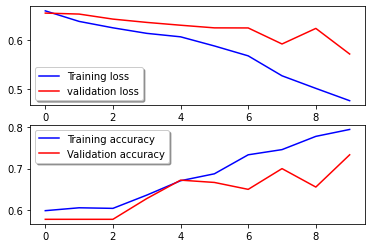

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


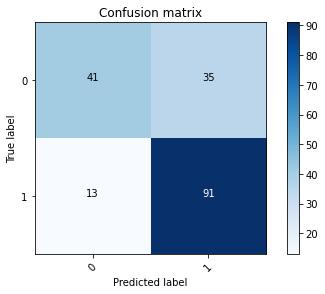

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/NIST Copy/Au/original_NC2016_0006.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 94.46


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/NIST Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/NIST Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 73.72
Class: fake Confidence: 73.69
Class: fake Confidence: 73.99
Class: fake Confidence: 70.65
Class: fake Confidence: 75.00
Class: fake Confidence: 75.00
Class: fake Confidence: 60.21
Class: fake Confidence: 64.16
Class: fake Confidence: 53.89
Class: fake Confidence: 67.04
Class: fake Confidence: 67.69
Class: fake Confidence: 74.87
Class: fake Confidence: 75.51
Class: fake Confidence: 74.39
Class: fake Confidence: 75.81
Class: fake Confidence: 69.16
Class: fake Confidence: 70.91
Class: fake Confidence: 54.72
Class: fake Confidence: 54.25
Class: fake Confidence: 73.89
Class: fake Confidence: 75.11
Class: fake Confidence: 68.70
Class: fake Confidence: 66.30
Class: fake Confidence: 56.45
Class: fake Confidence: 59.67
Class: fake Confidence: 63.64
Class: fake Confidence: 57.22
Class: fake Confidence: 55.23
Class: fake Confidence: 69.51
Class: fake Confidence: 57.84
Class: fake Confidence: 74.00
Class: fake Confidence: 74.71
Class: fake Confidence: 63.77
Class: fak

In [ ]:
fake_image_path = '/content/drive/MyDrive/NIST Copy/Tp/NC2016_0016.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 68.00


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/NIST Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/NIST Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 62.22
Class: real Confidence: 60.40
Class: real Confidence: 93.62
Class: real Confidence: 80.64
Class: real Confidence: 60.68
Class: real Confidence: 77.41
Class: real Confidence: 61.70
Class: real Confidence: 73.54
Class: real Confidence: 52.94
Class: real Confidence: 87.85
Class: real Confidence: 86.09
Class: real Confidence: 90.97
Class: real Confidence: 65.38
Class: real Confidence: 73.43
Class: real Confidence: 84.49
Class: real Confidence: 76.99
Class: real Confidence: 73.99
Class: real Confidence: 94.46
Class: real Confidence: 95.19
Class: real Confidence: 74.23
Class: real Confidence: 93.62
Class: real Confidence: 84.89
Class: real Confidence: 73.63
Class: real Confidence: 74.40
Class: real Confidence: 87.55
Class: real Confidence: 87.10
Class: real Confidence: 85.46
Class: real Confidence: 73.67
Class: real Confidence: 91.70
Class: real Confidence: 50.77
Class: real Confidence: 56.52
Class: real Confidence: 66.08
Class: real Confidence: 73.54
Class: rea

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 98.76
Class: real Confidence: 98.89
Class: real Confidence: 96.51
Class: real Confidence: 94.06
Class: real Confidence: 99.20
Class: real Confidence: 97.35
Class: real Confidence: 99.71
Class: real Confidence: 99.44
Class: real Confidence: 87.52
Class: real Confidence: 99.27
Class: real Confidence: 93.67
Class: real Confidence: 96.91
Class: real Confidence: 99.52
Class: real Confidence: 99.47
Class: real Confidence: 97.46
Class: real Confidence: 70.18
Class: real Confidence: 98.77
Class: real Confidence: 76.96
Class: real Confidence: 70.38
Class: real Confidence: 99.93
Class: real Confidence: 77.33
Class: real Confidence: 90.36
Class: real Confidence: 89.12
Class: real Confidence: 92.42
Class: real Confidence: 92.35
Class: real Confidence: 75.16
Class: real Confidence: 99.45
Class: real Confidence: 86.73
Class: real Confidence: 99.60
Class: real Confidence: 71.49
Class: real Confidence: 73.84
Class: real Confidence: 98.12
Class: real Confidence: 98.38
Class: rea

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 873, Correct: 777, Acc: 89.00343642611683
Total: 1261, Correct: 1043, Acc: 82.71213322759714


Total Images : 900 <br>
Authentic : 70%,630 images<br>
Tempered : 30%,270 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X7030 = [] # ELA converted images
Y7030 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/NIST Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y7030) == 630:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X7030.append(prepare_image(full_path))
            Y7030.append(1)
            if len(Y7030) % 10 == 0:
                print(f'Processing {len(Y7030)} images')


print(len(X7030), len(Y7030))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
630 630


In [ ]:
path = '/content/drive/MyDrive/NIST Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y7030) == 900:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X7030.append(prepare_image(full_path))
            Y7030.append(0)
            if len(Y7030) % 10 == 0:
                print(f'Processing {len(Y7030)} images')

print(len(X7030), len(Y7030))

Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing 840 images
Processing 850 images
Processing 860 images
Processing 870 images
Processing 880 images
Processing 890 images
Processing 900 images
900 900


In [ ]:
X7030 = np.array(X7030)
Y7030 = to_categorical(Y7030, 2)
X7030 = X7030.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X7030, Y7030, test_size = 0.2, random_state=5)
X7030 = X7030.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

720 720
180 180


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:

hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
23/23 [==============================] - 72s 3s/step - loss: 0.5803 - accuracy: 0.7028 - val_loss: 0.5591 - val_accuracy: 0.6444
Epoch 2/10
23/23 [==============================] - 71s 3s/step - loss: 0.5220 - accuracy: 0.7161 - val_loss: 0.5320 - val_accuracy: 0.6444
Epoch 3/10
23/23 [==============================] - 70s 3s/step - loss: 0.5217 - accuracy: 0.7094 - val_loss: 0.5322 - val_accuracy: 0.6667
Epoch 4/10
23/23 [==============================] - 70s 3s/step - loss: 0.4833 - accuracy: 0.7458 - val_loss: 0.4949 - val_accuracy: 0.7333
Epoch 5/10
23/23 [==============================] - 70s 3s/step - loss: 0.4617 - accuracy: 0.7609 - val_loss: 0.4697 - val_accuracy: 0.7667
Epoch 6/10
23/23 [==============================] - 77s 3s/step - loss: 0.4354 - accuracy: 0.7996 - val_loss: 0.4486 - val_accuracy: 0.7611
Epoch 7/10
23/23 [==============================] - 71s 3s/step - loss: 0.4160 - accuracy: 0.8040 - val_loss: 0.4203 - val_accuracy: 0.7722
Epoch 8/10
23/23 [==

In [ ]:
model.save('model_casia_run1.h5')

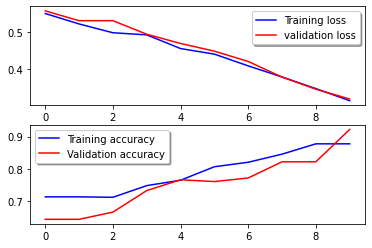

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


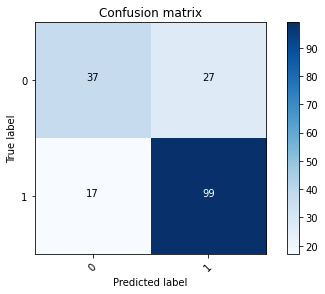

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/NIST Copy/Au/original_NC2016_0006.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 85.81


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/NIST Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/NIST Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')



Class: real Confidence: 56.06
Class: real Confidence: 93.61
Class: real Confidence: 82.94
Class: real Confidence: 90.51
Class: real Confidence: 60.44
Class: real Confidence: 70.28
Class: real Confidence: 89.12
Class: real Confidence: 86.04
Class: real Confidence: 91.65
Class: real Confidence: 68.60
Class: real Confidence: 76.40
Class: real Confidence: 85.21
Class: real Confidence: 77.57
Class: real Confidence: 71.56
Class: real Confidence: 97.95
Class: real Confidence: 97.73
Class: real Confidence: 85.03
Class: real Confidence: 97.49
Class: real Confidence: 92.60
Class: real Confidence: 62.29
Class: real Confidence: 65.06
Class: real Confidence: 84.37
Class: real Confidence: 84.09
Class: real Confidence: 95.53
Class: real Confidence: 90.32
Class: real Confidence: 97.56
Class: real Confidence: 54.80
Class: real Confidence: 53.87
Class: real Confidence: 76.41
Class: real Confidence: 70.84
Class: real Confidence: 89.81
Class: real Confidence: 79.66
Class: real Confidence: 82.29
Class: rea

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 99.46
Class: real Confidence: 99.02
Class: real Confidence: 97.90
Class: real Confidence: 95.12
Class: real Confidence: 99.73
Class: real Confidence: 94.34
Class: real Confidence: 99.68
Class: real Confidence: 99.90
Class: real Confidence: 78.34
Class: real Confidence: 99.94
Class: real Confidence: 92.95
Class: real Confidence: 98.57
Class: real Confidence: 99.52
Class: real Confidence: 99.90
Class: real Confidence: 99.90
Class: real Confidence: 71.93
Class: real Confidence: 98.37
Class: real Confidence: 92.72
Class: real Confidence: 99.95
Class: real Confidence: 100.00
Class: real Confidence: 80.59
Class: real Confidence: 99.13
Class: real Confidence: 96.29
Class: real Confidence: 97.63
Class: real Confidence: 99.99
Class: real Confidence: 93.59
Class: real Confidence: 99.60
Class: real Confidence: 99.94
Class: real Confidence: 93.58
Class: real Confidence: 99.99
Class: real Confidence: 75.10
Class: real Confidence: 85.57
Class: real Confidence: 99.77
Class: re

In [ ]:
fake_image_path = '/content/drive/MyDrive/NIST Copy/Tp/NC2016_0016.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 75.91


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/NIST Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/NIST Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: fake Confidence: 88.53
Class: fake Confidence: 88.42
Class: fake Confidence: 88.07
Class: fake Confidence: 74.07
Class: fake Confidence: 82.10
Class: fake Confidence: 82.10
Class: fake Confidence: 69.46
Class: fake Confidence: 65.05
Class: fake Confidence: 66.72
Class: fake Confidence: 79.61
Class: fake Confidence: 70.26
Class: fake Confidence: 75.75
Class: fake Confidence: 78.60
Class: fake Confidence: 87.95
Class: fake Confidence: 89.40
Class: fake Confidence: 63.28
Class: fake Confidence: 70.62
Class: fake Confidence: 86.49
Class: fake Confidence: 89.16
Class: fake Confidence: 77.67
Class: fake Confidence: 84.27
Class: fake Confidence: 67.43
Class: fake Confidence: 66.90
Class: fake Confidence: 78.28
Class: fake Confidence: 79.91
Class: fake Confidence: 83.82
Class: fake Confidence: 83.37
Class: fake Confidence: 54.54
Class: fake Confidence: 82.73
Class: fake Confidence: 79.32
Class: fake Confidence: 71.65
Class: fake Confidence: 83.96
Class: fake Confidence: 56.20
Class: fak

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 873, Correct: 735, Acc: 84.19243986254295
Total: 1261, Correct: 1018, Acc: 80.72957969865186


Total Images : 640 <br>
Authentic : 40%,256 images<br>
Tempered : 60%,384 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X4060 = [] # ELA converted images
Y4060 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/NIST Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y4060) == 256:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X4060.append(prepare_image(full_path))
            Y4060.append(1)
            if len(Y4060) % 10 == 0:
                print(f'Processing {len(Y4060)} images')


print(len(X4060), len(Y4060))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
256 256


In [ ]:
path = '/content/drive/MyDrive/NIST Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y4060) == 640:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X4060.append(prepare_image(full_path))
            Y4060.append(0)
            if len(Y4060) % 10 == 0:
                print(f'Processing {len(Y4060)} images')

print(len(X4060), len(Y4060))

Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
640 640


In [ ]:
X4060 = np.array(X4060)
Y4060 = to_categorical(Y4060, 2)
X4060 = X4060.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X4060, Y4060, test_size = 0.2, random_state=5)
X4060 = X4060.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

512 512
128 128


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:

hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
16/16 [==============================] - 53s 3s/step - loss: 0.6896 - accuracy: 0.5978 - val_loss: 0.6592 - val_accuracy: 0.6875
Epoch 2/10
16/16 [==============================] - 50s 3s/step - loss: 0.6547 - accuracy: 0.6221 - val_loss: 0.5912 - val_accuracy: 0.7266
Epoch 3/10
16/16 [==============================] - 51s 3s/step - loss: 0.6000 - accuracy: 0.7096 - val_loss: 0.5179 - val_accuracy: 0.7422
Epoch 4/10
16/16 [==============================] - 50s 3s/step - loss: 0.6244 - accuracy: 0.6428 - val_loss: 0.5213 - val_accuracy: 0.7031
Epoch 5/10
16/16 [==============================] - 51s 3s/step - loss: 0.6006 - accuracy: 0.6716 - val_loss: 0.5012 - val_accuracy: 0.7266
Epoch 6/10
16/16 [==============================] - 51s 3s/step - loss: 0.5715 - accuracy: 0.7189 - val_loss: 0.5756 - val_accuracy: 0.6797
Epoch 7/10
16/16 [==============================] - 50s 3s/step - loss: 0.5501 - accuracy: 0.7160 - val_loss: 0.5112 - val_accuracy: 0.7500
Epoch 8/10
16/16 [==

In [ ]:
model.save('model_casia_run1.h5')

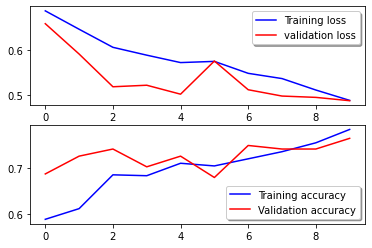

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


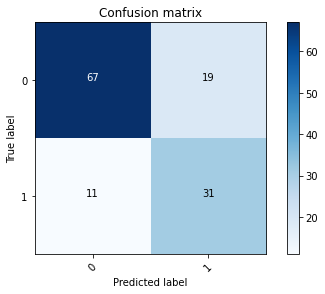

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']


In [ ]:

real_image_path = '/content/drive/MyDrive/NIST Copy/Au/original_NC2016_0006.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 93.34


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/NIST Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/NIST Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')




Class: real Confidence: 88.00
Class: real Confidence: 77.36
Class: real Confidence: 76.38
Class: real Confidence: 59.67
Class: real Confidence: 53.97
Class: real Confidence: 89.71
Class: real Confidence: 86.69
Class: real Confidence: 89.48
Class: real Confidence: 75.94
Class: real Confidence: 79.76
Class: real Confidence: 82.07
Class: real Confidence: 81.71
Class: real Confidence: 73.07
Class: real Confidence: 72.08
Class: real Confidence: 59.55
Class: real Confidence: 77.48
Class: real Confidence: 63.10
Class: real Confidence: 87.66
Class: real Confidence: 73.82
Class: real Confidence: 85.67
Class: real Confidence: 69.41
Class: real Confidence: 79.25
Class: real Confidence: 83.57
Class: real Confidence: 70.44
Class: real Confidence: 84.56
Class: real Confidence: 54.04
Class: real Confidence: 61.67
Class: real Confidence: 71.75
Class: real Confidence: 72.26
Class: real Confidence: 52.74
Class: real Confidence: 83.44
Class: real Confidence: 77.57
Class: real Confidence: 69.61
Class: rea

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 95.32
Class: real Confidence: 85.21
Class: real Confidence: 89.97
Class: real Confidence: 69.63
Class: real Confidence: 93.35
Class: real Confidence: 94.14
Class: real Confidence: 98.01
Class: real Confidence: 53.04
Class: real Confidence: 97.65
Class: real Confidence: 67.53
Class: real Confidence: 94.09
Class: real Confidence: 93.36
Class: real Confidence: 85.62
Class: real Confidence: 86.41
Class: real Confidence: 75.76
Class: real Confidence: 81.11
Class: real Confidence: 83.31
Class: real Confidence: 62.61
Class: real Confidence: 82.98
Class: real Confidence: 90.55
Class: real Confidence: 71.12
Class: real Confidence: 58.27
Class: real Confidence: 79.98
Class: real Confidence: 97.93
Class: real Confidence: 77.26
Class: real Confidence: 95.55
Class: real Confidence: 94.52
Class: real Confidence: 93.11
Class: real Confidence: 81.50
Class: real Confidence: 70.32
Class: real Confidence: 92.68
Class: real Confidence: 72.83
Class: real Confidence: 65.51
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/NIST Copy/Tp/NC2016_0016.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 92.72


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/NIST Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/NIST Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: fake Confidence: 97.51
Class: fake Confidence: 97.80
Class: fake Confidence: 97.12
Class: fake Confidence: 90.18
Class: fake Confidence: 93.54
Class: fake Confidence: 53.10
Class: fake Confidence: 93.54
Class: fake Confidence: 86.21
Class: fake Confidence: 52.48
Class: fake Confidence: 52.94
Class: fake Confidence: 88.52
Class: fake Confidence: 58.32
Class: fake Confidence: 71.36
Class: fake Confidence: 69.56
Class: fake Confidence: 97.68
Class: fake Confidence: 97.97
Class: fake Confidence: 77.87
Class: fake Confidence: 83.09
Class: fake Confidence: 98.87
Class: fake Confidence: 98.14
Class: fake Confidence: 72.98
Class: fake Confidence: 93.48
Class: fake Confidence: 64.28
Class: fake Confidence: 64.25
Class: fake Confidence: 77.99
Class: fake Confidence: 78.45
Class: fake Confidence: 94.06
Class: fake Confidence: 94.46
Class: fake Confidence: 59.84
Class: fake Confidence: 66.39
Class: fake Confidence: 88.26
Class: fake Confidence: 77.66
Class: fake Confidence: 67.87
Class: fak

In [ ]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 873, Correct: 404, Acc: 46.27720504009164
Total: 1261, Correct: 720, Acc: 57.097541633624104


Total Images : 540 <br>
Authentic : 30%,162 images<br>
Tempered : 70%,378 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X3070 = [] # ELA converted images
Y3070 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/NIST Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y3070) == 162:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X3070.append(prepare_image(full_path))
            Y3070.append(1)
            if len(Y3070) % 10 == 0:
                print(f'Processing {len(Y3070)} images')


print(len(X3070), len(Y3070))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
162 162


In [ ]:
path = '/content/drive/MyDrive/NIST Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y3070) == 540:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X3070.append(prepare_image(full_path))
            Y3070.append(0)
            if len(Y3070) % 10 == 0:
                print(f'Processing {len(Y3070)} images')

print(len(X3070), len(Y3070))

Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
540 540


In [ ]:
X3070 = np.array(X3070)
Y3070 = to_categorical(Y3070, 2)
X3070 = X3070.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X3070, Y3070, test_size = 0.2, random_state=5)
X3070 = X3070.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

432 432
108 108


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model

In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')


In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])


Epoch 1/10
14/14 [==============================] - 44s 3s/step - loss: 0.6650 - accuracy: 0.6429 - val_loss: 0.5515 - val_accuracy: 0.7593
Epoch 2/10
14/14 [==============================] - 42s 3s/step - loss: 0.5896 - accuracy: 0.6816 - val_loss: 0.4895 - val_accuracy: 0.7593
Epoch 3/10
14/14 [==============================] - 42s 3s/step - loss: 0.6008 - accuracy: 0.6395 - val_loss: 0.4604 - val_accuracy: 0.7593
Epoch 4/10
14/14 [==============================] - 42s 3s/step - loss: 0.5722 - accuracy: 0.6578 - val_loss: 0.4771 - val_accuracy: 0.7593
Epoch 5/10
14/14 [==============================] - 42s 3s/step - loss: 0.5136 - accuracy: 0.6979 - val_loss: 0.4702 - val_accuracy: 0.7593
Epoch 6/10
14/14 [==============================] - 42s 3s/step - loss: 0.5254 - accuracy: 0.6640 - val_loss: 0.4602 - val_accuracy: 0.7593
Epoch 7/10
14/14 [==============================] - 42s 3s/step - loss: 0.4952 - accuracy: 0.7008 - val_loss: 0.4687 - val_accuracy: 0.7593
Epoch 8/10
14/14 [==

In [ ]:
model.save('model_casia_run1.h5')

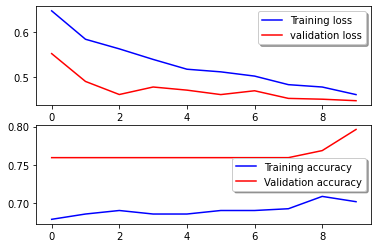

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


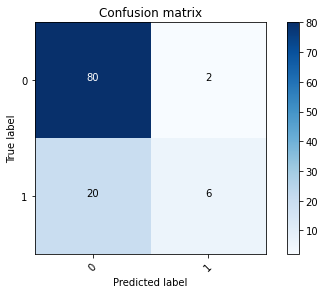

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/NIST Copy/Au/original_NC2016_0006.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 51.00


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/NIST Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/NIST Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: real Confidence: 52.24
Class: real Confidence: 51.51
Class: real Confidence: 52.13
Class: real Confidence: 52.04
Class: real Confidence: 52.57
Class: real Confidence: 50.71
Class: real Confidence: 51.60
Class: real Confidence: 51.97
Class: real Confidence: 51.69
Class: real Confidence: 50.43
Class: real Confidence: 52.52
Class: real Confidence: 52.14
Class: real Confidence: 53.88
Class: real Confidence: 53.55
Class: real Confidence: 53.12
Class: real Confidence: 50.09
Class: real Confidence: 50.67
Class: real Confidence: 50.71
Class: real Confidence: 58.12
Class: real Confidence: 54.26
Class: real Confidence: 50.42
Class: real Confidence: 52.39
Class: real Confidence: 51.04
Class: real Confidence: 50.03
Class: real Confidence: 51.48
Class: real Confidence: 50.93
Class: real Confidence: 52.03
Class: real Confidence: 52.04
Class: real Confidence: 52.90
Class: real Confidence: 51.56
Class: real Confidence: 51.83
Class: real Confidence: 51.26
Class: real Confidence: 53.18
Class: rea

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7496 bytes but only got 5524. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)


Class: real Confidence: 50.77
Class: real Confidence: 52.02
Class: real Confidence: 52.45
Class: real Confidence: 51.12
Class: real Confidence: 50.75
Class: real Confidence: 50.90
Class: real Confidence: 50.15
Class: real Confidence: 51.01
Class: real Confidence: 50.78


In [ ]:
fake_image_path = '/content/drive/MyDrive/NIST Copy/Tp/NC2016_0016.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 95.66


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/NIST Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/NIST Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 99.28
Class: fake Confidence: 99.61
Class: fake Confidence: 98.70
Class: fake Confidence: 87.29
Class: fake Confidence: 94.38
Class: fake Confidence: 59.40
Class: fake Confidence: 94.38
Class: fake Confidence: 91.94
Class: fake Confidence: 63.26
Class: fake Confidence: 61.71
Class: fake Confidence: 94.03
Class: fake Confidence: 70.50
Class: fake Confidence: 52.43
Class: fake Confidence: 54.49
Class: fake Confidence: 66.99
Class: fake Confidence: 66.51
Class: fake Confidence: 98.71
Class: fake Confidence: 99.20
Class: fake Confidence: 85.04
Class: fake Confidence: 88.10
Class: fake Confidence: 99.98
Class: fake Confidence: 99.55
Class: fake Confidence: 69.99
Class: fake Confidence: 98.35
Class: fake Confidence: 69.78
Class: fake Confidence: 69.62
Class: fake Confidence: 73.27
Class: fake Confidence: 74.15
Class: fake Confidence: 99.54
Class: fake Confidence: 99.60
Class: fake Confidence: 62.93
Class: fake Confidence: 66.12
Class: fake Confidence: 95.79
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 873, Correct: 86, Acc: 9.851088201603666
Total: 1261, Correct: 470, Acc: 37.272006344171295


Using IMD dataset

Total Images : 820 <br>
Authentic Images : 50%, 410 images <br>
Tempered Images : 50%, 410 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

X5050 = [] # ELA converted images
Y5050 = [] # 0 for fake, 1 for real


In [ ]:
import random
path = '/content/drive/MyDrive/Imd Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y5050) == 410:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X5050.append(prepare_image(full_path))
            Y5050.append(1)
            if len(Y5050) % 10 == 0:
                print(f'Processing {len(Y5050)} images')


print(len(X5050), len(Y5050))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
Processing 410 images
410 410


In [ ]:

path = '/content/drive/MyDrive/Imd Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y5050) == 820:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X5050.append(prepare_image(full_path))
            Y5050.append(0)
            if len(Y5050) % 10 == 0:
                print(f'Processing {len(Y5050)} images')

print(len(X5050), len(Y5050))

Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
820 820


In [ ]:
X5050 = np.array(X5050)
Y5050 = to_categorical(Y5050, 2)
X5050 = X5050.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X5050, Y5050, test_size = 0.2, random_state=5)
X5050 = X5050.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))


656 656
164 164


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model


In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:

hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
21/21 [==============================] - 63s 3s/step - loss: 0.6899 - accuracy: 0.5360 - val_loss: 0.6867 - val_accuracy: 0.5915
Epoch 2/10
21/21 [==============================] - 61s 3s/step - loss: 0.6783 - accuracy: 0.6042 - val_loss: 0.6600 - val_accuracy: 0.6524
Epoch 3/10
21/21 [==============================] - 62s 3s/step - loss: 0.6481 - accuracy: 0.6757 - val_loss: 0.6386 - val_accuracy: 0.6646
Epoch 4/10
21/21 [==============================] - 62s 3s/step - loss: 0.6328 - accuracy: 0.6514 - val_loss: 0.6252 - val_accuracy: 0.6768
Epoch 5/10
21/21 [==============================] - 61s 3s/step - loss: 0.6048 - accuracy: 0.7241 - val_loss: 0.6153 - val_accuracy: 0.6890
Epoch 6/10
21/21 [==============================] - 62s 3s/step - loss: 0.6246 - accuracy: 0.6907 - val_loss: 0.6275 - val_accuracy: 0.6768
Epoch 7/10
21/21 [==============================] - 62s 3s/step - loss: 0.6071 - accuracy: 0.6767 - val_loss: 0.6068 - val_accuracy: 0.6951
Epoch 8/10
21/21 [==

In [ ]:
model.save('model_casia_run1.h5')


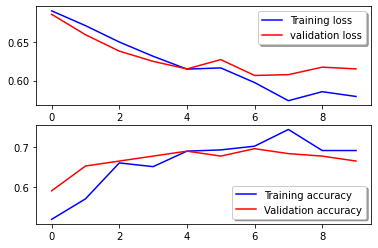

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


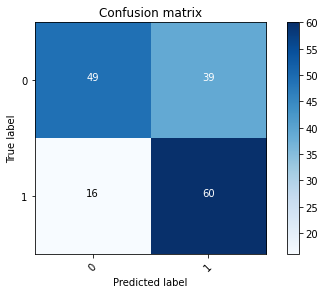

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/Imd Copy/Au/00006_orig.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 98.27


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/Imd Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/Imd Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: real Confidence: 87.96
Class: real Confidence: 67.69
Class: real Confidence: 61.59
Class: real Confidence: 90.69
Class: real Confidence: 97.01
Class: real Confidence: 94.06
Class: real Confidence: 96.26
Class: real Confidence: 98.86
Class: real Confidence: 52.17
Class: real Confidence: 92.58
Class: real Confidence: 84.66
Class: real Confidence: 70.40
Class: real Confidence: 96.99
Class: real Confidence: 99.32
Class: real Confidence: 87.99
Class: real Confidence: 71.08
Class: real Confidence: 97.56
Class: real Confidence: 81.96
Class: real Confidence: 77.74
Class: real Confidence: 54.45
Class: real Confidence: 90.79
Class: real Confidence: 85.12
Class: real Confidence: 91.68
Class: real Confidence: 94.80
Class: real Confidence: 88.37
Class: real Confidence: 72.98
Class: real Confidence: 97.47
Class: real Confidence: 58.59
Class: real Confidence: 94.04
Class: real Confidence: 55.06
Class: real Confidence: 91.16
Class: real Confidence: 98.57
Class: real Confidence: 96.84
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/Imd Copy/Tp/00006_fake.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 98.44


ekhane

In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/Imd Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/Imd Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')



Class: fake Confidence: 63.06
Class: fake Confidence: 64.65
Class: fake Confidence: 80.57
Class: fake Confidence: 63.26
Class: fake Confidence: 68.96
Class: fake Confidence: 54.27
Class: fake Confidence: 53.23
Class: fake Confidence: 66.51
Class: fake Confidence: 78.08
Class: fake Confidence: 75.40
Class: fake Confidence: 71.93
Class: fake Confidence: 66.77
Class: fake Confidence: 78.05
Class: fake Confidence: 59.75
Class: fake Confidence: 63.71
Class: fake Confidence: 69.26
Class: fake Confidence: 68.31
Class: fake Confidence: 71.09
Class: fake Confidence: 69.64
Class: fake Confidence: 69.36
Class: fake Confidence: 60.97
Class: fake Confidence: 51.38
Class: fake Confidence: 64.37
Class: fake Confidence: 60.82
Class: fake Confidence: 72.14
Class: fake Confidence: 57.06
Class: fake Confidence: 76.92
Class: fake Confidence: 68.58
Class: fake Confidence: 67.12
Class: fake Confidence: 76.96
Class: fake Confidence: 70.89
Class: fake Confidence: 72.56
Class: fake Confidence: 79.32
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 414, Correct: 350, Acc: 84.54106280193237
Total: 2227, Correct: 1216, Acc: 54.602604400538844


Total Images 680: <br>
Authentic Images : 60%, 408 images <br>
Tempered Images : 40%, 272 

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)

In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:

X6040 = [] # ELA converted images
Y6040 = [] # 0 for fake, 1 for real


In [ ]:


import random
path = '/content/drive/MyDrive/Imd Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y6040) == 408:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X6040.append(prepare_image(full_path))
            Y6040.append(1)
            if len(Y6040) % 10 == 0:
                print(f'Processing {len(Y6040)} images')


print(len(X6040), len(Y6040))


Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
408 408


In [ ]:

path = '/content/drive/MyDrive/Imd Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y6040) == 680:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X6040.append(prepare_image(full_path))
            Y6040.append(0)
            if len(Y6040) % 10 == 0:
                print(f'Processing {len(Y6040)} images')

print(len(X6040), len(Y6040))

Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
680 680


In [ ]:
X6040 = np.array(X6040)
Y6040 = to_categorical(Y6040, 2)
X6040 = X6040.reshape(-1, 128, 128, 3)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X6040, Y6040, test_size = 0.2, random_state=5)
X6040 = X6040.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))


544 544
136 136


In [ ]:


def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model




In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
17/17 [==============================] - 57s 3s/step - loss: 0.6755 - accuracy: 0.5852 - val_loss: 0.6362 - val_accuracy: 0.5882
Epoch 2/10
17/17 [==============================] - 51s 3s/step - loss: 0.6364 - accuracy: 0.6136 - val_loss: 0.6301 - val_accuracy: 0.5882
Epoch 3/10
17/17 [==============================] - 51s 3s/step - loss: 0.6449 - accuracy: 0.6019 - val_loss: 0.6266 - val_accuracy: 0.5882
Epoch 4/10
17/17 [==============================] - 51s 3s/step - loss: 0.6050 - accuracy: 0.6581 - val_loss: 0.6096 - val_accuracy: 0.6397
Epoch 5/10
17/17 [==============================] - 51s 3s/step - loss: 0.5893 - accuracy: 0.6934 - val_loss: 0.6040 - val_accuracy: 0.6618
Epoch 6/10
17/17 [==============================] - 51s 3s/step - loss: 0.5684 - accuracy: 0.7622 - val_loss: 0.6099 - val_accuracy: 0.6176
Epoch 7/10
17/17 [==============================] - 51s 3s/step - loss: 0.5719 - accuracy: 0.7314 - val_loss: 0.5930 - val_accuracy: 0.6765
Epoch 8/10
17/17 [==

In [ ]:
model.save('model_casia_run1.h5')

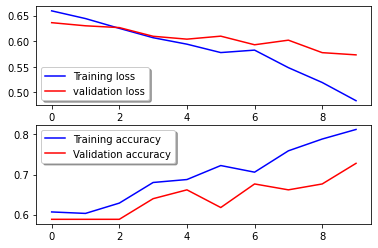

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

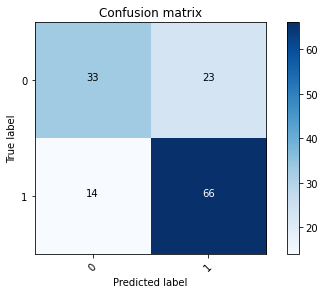

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [ ]:

class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/Imd Copy/Au/00006_orig.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: real Confidence: 98.24


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/Imd Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/Imd Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 95.66
Class: real Confidence: 65.12
Class: real Confidence: 65.16
Class: real Confidence: 97.95
Class: real Confidence: 97.26
Class: real Confidence: 89.37
Class: real Confidence: 95.29
Class: real Confidence: 99.29
Class: real Confidence: 51.41
Class: real Confidence: 59.82
Class: real Confidence: 96.62
Class: real Confidence: 91.07
Class: real Confidence: 72.06
Class: real Confidence: 98.01
Class: real Confidence: 99.24
Class: real Confidence: 51.36
Class: real Confidence: 89.29
Class: real Confidence: 81.48
Class: real Confidence: 97.30
Class: real Confidence: 74.53
Class: real Confidence: 77.91
Class: real Confidence: 64.76
Class: real Confidence: 92.09
Class: real Confidence: 88.65
Class: real Confidence: 90.69
Class: real Confidence: 64.40
Class: real Confidence: 97.79
Class: real Confidence: 91.06
Class: real Confidence: 68.04
Class: real Confidence: 98.73
Class: real Confidence: 64.07
Class: real Confidence: 52.01
Class: real Confidence: 88.90
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/Imd Copy/Tp/00010_fake_01.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 88.14


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/Imd Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/Imd Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 63.68
Class: fake Confidence: 62.76
Class: fake Confidence: 67.32
Class: fake Confidence: 85.49
Class: fake Confidence: 80.08
Class: fake Confidence: 58.81
Class: fake Confidence: 73.29
Class: fake Confidence: 68.00
Class: fake Confidence: 52.14
Class: fake Confidence: 75.34
Class: fake Confidence: 54.91
Class: fake Confidence: 88.51
Class: fake Confidence: 86.48
Class: fake Confidence: 94.31
Class: fake Confidence: 76.61
Class: fake Confidence: 80.23
Class: fake Confidence: 66.81
Class: fake Confidence: 85.50
Class: fake Confidence: 59.54
Class: fake Confidence: 92.56
Class: fake Confidence: 89.94
Class: fake Confidence: 89.53
Class: fake Confidence: 90.70
Class: fake Confidence: 92.90
Class: fake Confidence: 68.74
Class: fake Confidence: 69.47
Class: fake Confidence: 61.61
Class: fake Confidence: 89.62
Class: fake Confidence: 88.86
Class: fake Confidence: 91.03
Class: fake Confidence: 82.65
Class: fake Confidence: 87.10
Class: fake Confidence: 58.48
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 414, Correct: 369, Acc: 89.13043478260869
Total: 2227, Correct: 1228, Acc: 55.14144589133363


Total Images : 580<br>
Authentic Images : 70%, 406 images <br>
Tempered Images : 30%, 174 images 

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools


In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)


In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X7030 = [] # ELA converted images
Y7030 = [] # 0 for fake, 1 for real

In [ ]:


import random
path = '/content/drive/MyDrive/Imd Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y7030) == 406:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X7030.append(prepare_image(full_path))
            Y7030.append(1)
            if len(Y7030) % 10 == 0:
                print(f'Processing {len(Y7030)} images')


print(len(X7030), len(Y7030))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
406 406


In [ ]:
path = '/content/drive/MyDrive/Imd Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y7030) == 580:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X7030.append(prepare_image(full_path))
            Y7030.append(0)
            if len(Y7030) % 10 == 0:
                print(f'Processing {len(Y7030)} images')

print(len(X7030), len(Y7030))

Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
580 580


In [ ]:
X7030 = np.array(X7030)
Y7030 = to_categorical(Y7030, 2)
X7030 = X7030.reshape(-1, 128, 128, 3)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X7030, Y7030, test_size = 0.2, random_state=5)
X7030 = X7030.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))


464 464
116 116


In [ ]:


def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model




In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
15/15 [==============================] - 45s 3s/step - loss: 0.6221 - accuracy: 0.6502 - val_loss: 0.6364 - val_accuracy: 0.6552
Epoch 2/10
15/15 [==============================] - 43s 3s/step - loss: 0.5840 - accuracy: 0.7056 - val_loss: 0.6281 - val_accuracy: 0.6552
Epoch 3/10
15/15 [==============================] - 43s 3s/step - loss: 0.5563 - accuracy: 0.7205 - val_loss: 0.6199 - val_accuracy: 0.6552
Epoch 4/10
15/15 [==============================] - 43s 3s/step - loss: 0.5578 - accuracy: 0.7213 - val_loss: 0.6194 - val_accuracy: 0.6552
Epoch 5/10
15/15 [==============================] - 43s 3s/step - loss: 0.5651 - accuracy: 0.7161 - val_loss: 0.6147 - val_accuracy: 0.6552
Epoch 6/10
15/15 [==============================] - 43s 3s/step - loss: 0.5009 - accuracy: 0.7345 - val_loss: 0.5994 - val_accuracy: 0.6552
Epoch 7/10
15/15 [==============================] - 43s 3s/step - loss: 0.5210 - accuracy: 0.7254 - val_loss: 0.5902 - val_accuracy: 0.6552
Epoch 8/10
15/15 [==

In [ ]:
model.save('model_casia_run1.h5')

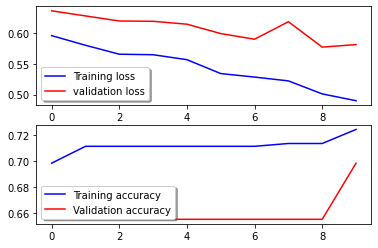

In [ ]:

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

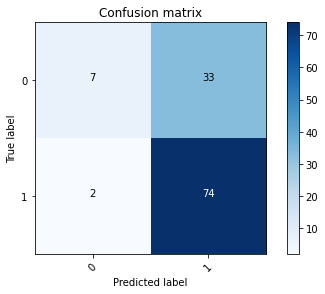

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:

real_image_path = '/content/drive/MyDrive/Imd Copy/Au/00006_orig.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 95.97


In [ ]:

real_image = os.listdir('/content/drive/MyDrive/Imd Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/Imd Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 87.86
Class: real Confidence: 76.38
Class: real Confidence: 64.43
Class: real Confidence: 95.37
Class: real Confidence: 95.20
Class: real Confidence: 89.50
Class: real Confidence: 88.03
Class: real Confidence: 52.37
Class: real Confidence: 98.53
Class: real Confidence: 61.83
Class: real Confidence: 71.04
Class: real Confidence: 95.66
Class: real Confidence: 85.19
Class: real Confidence: 78.04
Class: real Confidence: 94.42
Class: real Confidence: 98.14
Class: real Confidence: 83.74
Class: real Confidence: 90.78
Class: real Confidence: 79.71
Class: real Confidence: 53.53
Class: real Confidence: 89.54
Class: real Confidence: 73.74
Class: real Confidence: 73.04
Class: real Confidence: 60.57
Class: real Confidence: 88.64
Class: real Confidence: 85.39
Class: real Confidence: 91.00
Class: real Confidence: 67.84
Class: real Confidence: 59.00
Class: real Confidence: 95.65
Class: real Confidence: 84.53
Class: real Confidence: 62.00
Class: real Confidence: 94.02
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/Imd Copy/Tp/00006_fake.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 95.86


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/Imd Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/Imd Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 52.47
Class: fake Confidence: 53.80
Class: fake Confidence: 52.50
Class: fake Confidence: 52.09
Class: fake Confidence: 54.09
Class: fake Confidence: 53.84
Class: fake Confidence: 53.05
Class: fake Confidence: 52.87
Class: fake Confidence: 52.73
Class: fake Confidence: 52.88
Class: fake Confidence: 53.72
Class: fake Confidence: 54.66
Class: fake Confidence: 52.71
Class: fake Confidence: 52.70
Class: fake Confidence: 53.36
Class: fake Confidence: 53.47
Class: fake Confidence: 53.66
Class: fake Confidence: 53.81
Class: fake Confidence: 54.32
Class: fake Confidence: 53.56
Class: fake Confidence: 53.53
Class: fake Confidence: 52.69
Class: fake Confidence: 55.66
Class: fake Confidence: 55.40
Class: fake Confidence: 52.86
Class: fake Confidence: 51.89
Class: fake Confidence: 53.41
Class: fake Confidence: 50.36
Class: fake Confidence: 52.10
Class: fake Confidence: 51.16
Class: fake Confidence: 50.97
Class: fake Confidence: 56.10
Class: fake Confidence: 55.05
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 414, Correct: 406, Acc: 98.06763285024155
Total: 2227, Correct: 521, Acc: 23.394701392007182


Total Images : 1000 <br>
Authentic Images : 40%, 400 images <br>
Tempered Images : 60%, 600 images 

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)


In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X4060 = [] # ELA converted images
Y4060 = [] # 0 for fake, 1 for real


In [ ]:


import random
path = '/content/drive/MyDrive/Imd Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y4060) == 400:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X4060.append(prepare_image(full_path))
            Y4060.append(1)
            if len(Y4060) % 10 == 0:
                print(f'Processing {len(Y4060)} images')


print(len(X4060), len(Y4060))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
Processing 400 images
400 400


In [ ]:
path = '/content/drive/MyDrive/Imd Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y4060) == 1000:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X4060.append(prepare_image(full_path))
            Y4060.append(0)
            if len(Y4060) % 10 == 0:
                print(f'Processing {len(Y4060)} images')

print(len(X4060), len(Y4060))

Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing 840 images
Processing 850 images
Processing

In [ ]:
X4060 = np.array(X4060)
Y4060 = to_categorical(Y4060, 2)
X4060 = X4060.reshape(-1, 128, 128, 3)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X4060, Y4060, test_size = 0.2, random_state=5)
X4060 = X4060.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))


800 800
200 200


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model


In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32


In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')


In [ ]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
25/25 [==============================] - 76s 3s/step - loss: 0.5538 - accuracy: 0.7262 - val_loss: 0.5533 - val_accuracy: 0.7250
Epoch 2/10
25/25 [==============================] - 75s 3s/step - loss: 0.5348 - accuracy: 0.7638 - val_loss: 0.5585 - val_accuracy: 0.7200
Epoch 3/10
25/25 [==============================] - 76s 3s/step - loss: 0.5118 - accuracy: 0.7600 - val_loss: 0.5522 - val_accuracy: 0.7300
Epoch 4/10
25/25 [==============================] - 76s 3s/step - loss: 0.4914 - accuracy: 0.7800 - val_loss: 0.5846 - val_accuracy: 0.7150
Epoch 5/10
25/25 [==============================] - 76s 3s/step - loss: 0.4835 - accuracy: 0.7912 - val_loss: 0.5518 - val_accuracy: 0.7250
Epoch 6/10
25/25 [==============================] - 76s 3s/step - loss: 0.4463 - accuracy: 0.8275 - val_loss: 0.5642 - val_accuracy: 0.7500
Epoch 7/10
25/25 [==============================] - 76s 3s/step - loss: 0.4329 - accuracy: 0.8175 - val_loss: 0.5655 - val_accuracy: 0.7050
Epoch 8/10
25/25 [==

In [ ]:
model.save('model_casia_run1.h5')

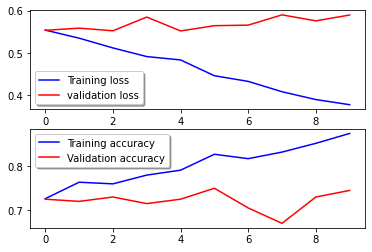

In [ ]:

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

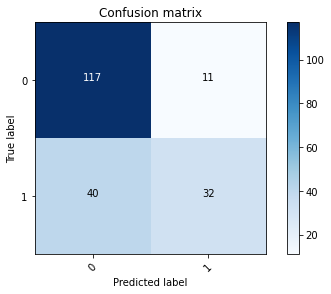

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/content/drive/MyDrive/Imd Copy/Au/00006_orig.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 94.22


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/Imd Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/Imd Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 97.43
Class: real Confidence: 84.90
Class: real Confidence: 83.60
Class: real Confidence: 89.31
Class: real Confidence: 88.57
Class: real Confidence: 98.57
Class: real Confidence: 98.82
Class: real Confidence: 63.34
Class: real Confidence: 84.81
Class: real Confidence: 86.05
Class: real Confidence: 71.72
Class: real Confidence: 55.51
Class: real Confidence: 95.50
Class: real Confidence: 99.46
Class: real Confidence: 51.26
Class: real Confidence: 96.38
Class: real Confidence: 91.92
Class: real Confidence: 92.97
Class: real Confidence: 73.17
Class: real Confidence: 87.71
Class: real Confidence: 84.43
Class: real Confidence: 94.42
Class: real Confidence: 85.16
Class: real Confidence: 73.58
Class: real Confidence: 97.93
Class: real Confidence: 86.74
Class: real Confidence: 62.38
Class: real Confidence: 99.45
Class: real Confidence: 95.00
Class: real Confidence: 99.45
Class: real Confidence: 99.20
Class: real Confidence: 96.45
Class: real Confidence: 97.73
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/Imd Copy/Tp/00006_fake.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 90.78


In [ ]:


fake_image = os.listdir(f'/content/drive/MyDrive/Imd Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/Imd Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Class: fake Confidence: 96.16
Class: fake Confidence: 91.85
Class: fake Confidence: 96.63
Class: fake Confidence: 99.48
Class: fake Confidence: 97.09
Class: fake Confidence: 86.69
Class: fake Confidence: 98.28
Class: fake Confidence: 91.13
Class: fake Confidence: 85.13
Class: fake Confidence: 86.71
Class: fake Confidence: 92.44
Class: fake Confidence: 99.44
Class: fake Confidence: 98.80
Class: fake Confidence: 99.71
Class: fake Confidence: 99.46
Class: fake Confidence: 99.92
Class: fake Confidence: 99.71
Class: fake Confidence: 99.12
Class: fake Confidence: 84.39
Class: fake Confidence: 98.00
Class: fake Confidence: 81.10
Class: fake Confidence: 88.83
Class: fake Confidence: 87.93
Class: fake Confidence: 93.28
Class: fake Confidence: 86.75
Class: fake Confidence: 93.62
Class: fake Confidence: 61.68
Class: fake Confidence: 99.74
Class: fake Confidence: 97.98
Class: fake Confidence: 98.98
Class: fake Confidence: 99.74
Class: fake Confidence: 99.80
Class: fake Confidence: 86.44
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 414, Correct: 283, Acc: 68.35748792270532
Total: 2227, Correct: 1759, Acc: 78.98518185900313


Total Images : 1300<br>
Authentic Images : 30%, 390 images<br>
Tempered Images : 70%, 910 images

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    #print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [ ]:
image_size = (128, 128)


In [ ]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [ ]:
X3070 = [] # ELA converted images
Y3070 = [] # 0 for fake, 1 for real

In [ ]:
import random
path = '/content/drive/MyDrive/Imd Copy/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y3070) == 390:
          break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X3070.append(prepare_image(full_path))
            Y3070.append(1)
            if len(Y3070) % 10 == 0:
                print(f'Processing {len(Y3070)} images')


print(len(X3070), len(Y3070))

Processing 10 images
Processing 20 images
Processing 30 images
Processing 40 images
Processing 50 images
Processing 60 images
Processing 70 images
Processing 80 images
Processing 90 images
Processing 100 images
Processing 110 images
Processing 120 images
Processing 130 images
Processing 140 images
Processing 150 images
Processing 160 images
Processing 170 images
Processing 180 images
Processing 190 images
Processing 200 images
Processing 210 images
Processing 220 images
Processing 230 images
Processing 240 images
Processing 250 images
Processing 260 images
Processing 270 images
Processing 280 images
Processing 290 images
Processing 300 images
Processing 310 images
Processing 320 images
Processing 330 images
Processing 340 images
Processing 350 images
Processing 360 images
Processing 370 images
Processing 380 images
Processing 390 images
390 390


In [ ]:
path = '/content/drive/MyDrive/Imd Copy/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if len(Y3070) == 1300:
            break
        if filename.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X3070.append(prepare_image(full_path))
            Y3070.append(0)
            if len(Y3070) % 10 == 0:
                print(f'Processing {len(Y3070)} images')

print(len(X3070), len(Y3070))

Processing 400 images
Processing 410 images
Processing 420 images
Processing 430 images
Processing 440 images
Processing 450 images
Processing 460 images
Processing 470 images
Processing 480 images
Processing 490 images
Processing 500 images
Processing 510 images
Processing 520 images
Processing 530 images
Processing 540 images
Processing 550 images
Processing 560 images
Processing 570 images
Processing 580 images
Processing 590 images
Processing 600 images
Processing 610 images
Processing 620 images
Processing 630 images
Processing 640 images
Processing 650 images
Processing 660 images
Processing 670 images
Processing 680 images
Processing 690 images
Processing 700 images
Processing 710 images
Processing 720 images
Processing 730 images
Processing 740 images
Processing 750 images
Processing 760 images
Processing 770 images
Processing 780 images
Processing 790 images
Processing 800 images
Processing 810 images
Processing 820 images
Processing 830 images
Processing 840 images
Processing

In [ ]:
X3070 = np.array(X3070)
Y3070 = to_categorical(Y3070, 2)
X3070 = X3070.reshape(-1, 128, 128, 3)


In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(X3070, Y3070, test_size = 0.2, random_state=5)
X3070 = X3070.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

1040 1040
260 260


In [ ]:
def build_model():
    model = Sequential()
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
   # print(model)
    model.add(MaxPool2D(pool_size = (2, 2)))
   # print(model)
    model.add(Dropout(0.25))
   # print(model)
    model.add(Flatten())
   # print(model)
    model.add(Dense(256, activation = 'relu'))
   # print(model)
    model.add(Dropout(0.5))
   # print(model)
    model.add(Dense(2, activation = 'softmax'))
   # print(model)
    return model


In [ ]:
model = build_model()
#print(model)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:

hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
33/33 [==============================] - 100s 3s/step - loss: 0.6624 - accuracy: 0.6614 - val_loss: 0.5777 - val_accuracy: 0.7423
Epoch 2/10
33/33 [==============================] - 102s 3s/step - loss: 0.5907 - accuracy: 0.7004 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 3/10
33/33 [==============================] - 99s 3s/step - loss: 0.5583 - accuracy: 0.7051 - val_loss: 0.5670 - val_accuracy: 0.7154
Epoch 4/10
33/33 [==============================] - 99s 3s/step - loss: 0.5709 - accuracy: 0.6950 - val_loss: 0.5704 - val_accuracy: 0.7154
Epoch 5/10
33/33 [==============================] - 99s 3s/step - loss: 0.5556 - accuracy: 0.7108 - val_loss: 0.5566 - val_accuracy: 0.7346
Epoch 6/10
33/33 [==============================] - 102s 3s/step - loss: 0.5396 - accuracy: 0.7144 - val_loss: 0.5661 - val_accuracy: 0.7077
Epoch 7/10
33/33 [==============================] - 107s 3s/step - loss: 0.5190 - accuracy: 0.7146 - val_loss: 0.5705 - val_accuracy: 0.6846
Epoch 8/10
33/33

In [ ]:
model.save('model_casia_run1.h5')

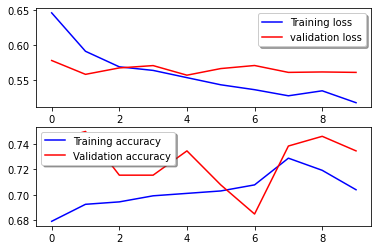

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

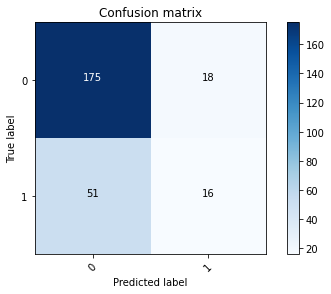

In [ ]:

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
class_names = ['fake', 'real']


In [ ]:
real_image_path = '/content/drive/MyDrive/Imd Copy/Au/00006_orig.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 56.28


In [ ]:
real_image = os.listdir('/content/drive/MyDrive/Imd Copy/Au')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('/content/drive/MyDrive/Imd Copy/Au', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 57.79
Class: real Confidence: 56.37
Class: real Confidence: 57.93
Class: real Confidence: 57.70
Class: real Confidence: 58.52
Class: real Confidence: 50.13
Class: real Confidence: 57.91
Class: real Confidence: 52.94
Class: real Confidence: 50.94
Class: real Confidence: 50.18
Class: real Confidence: 55.32
Class: real Confidence: 52.24
Class: real Confidence: 56.25
Class: real Confidence: 50.05
Class: real Confidence: 51.84
Class: real Confidence: 59.31
Class: real Confidence: 55.45
Class: real Confidence: 55.65
Class: real Confidence: 50.32
Class: real Confidence: 52.17
Class: real Confidence: 50.71
Class: real Confidence: 55.91
Class: real Confidence: 58.43
Class: real Confidence: 56.05
Class: real Confidence: 57.72
Class: real Confidence: 53.02
Class: real Confidence: 55.23
Class: real Confidence: 57.31
Class: real Confidence: 54.33
Class: real Confidence: 52.98
Class: real Confidence: 56.33
Class: real Confidence: 55.30
Class: real Confidence: 50.96
Class: rea

In [ ]:
fake_image_path = '/content/drive/MyDrive/Imd Copy/Tp/00006_fake.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: real Confidence: 56.49


In [ ]:
fake_image = os.listdir(f'/content/drive/MyDrive/Imd Copy/Tp')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png') or filename.endswith('tif'):
        fake_image_path = os.path.join(f'/content/drive/MyDrive/Imd Copy/Tp', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
            print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 97.97
Class: fake Confidence: 95.65
Class: fake Confidence: 96.37
Class: fake Confidence: 98.09
Class: fake Confidence: 95.45
Class: fake Confidence: 80.02
Class: fake Confidence: 97.05
Class: fake Confidence: 89.01
Class: fake Confidence: 71.26
Class: fake Confidence: 50.68
Class: fake Confidence: 76.92
Class: fake Confidence: 97.71
Class: fake Confidence: 85.88
Class: fake Confidence: 98.76
Class: fake Confidence: 98.70
Class: fake Confidence: 98.29
Class: fake Confidence: 94.26
Class: fake Confidence: 98.36
Class: fake Confidence: 71.25
Class: fake Confidence: 94.73
Class: fake Confidence: 93.03
Class: fake Confidence: 91.01
Class: fake Confidence: 94.95
Class: fake Confidence: 95.72
Class: fake Confidence: 68.96
Class: fake Confidence: 56.57
Class: fake Confidence: 95.66
Class: fake Confidence: 99.00
Class: fake Confidence: 97.57
Class: fake Confidence: 94.19
Class: fake Confidence: 95.53
Class: fake Confidence: 88.36
Class: fake Confidence: 93.68
Class: fak

In [ ]:

correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 414, Correct: 131, Acc: 31.642512077294686
Total: 2227, Correct: 1795, Acc: 80.60170633138752


Summary & Comparison

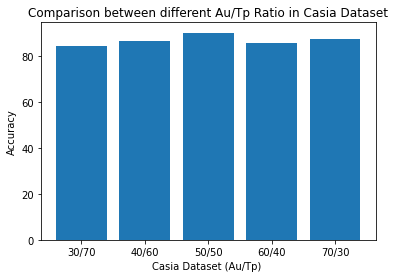

In [11]:
import matplotlib.pyplot as plt
casia_langs = ['30/70', '40/60', '50/50', '60/40', '70/30']
casia_accuracy = [84.35,86.79,90.25,85.59,87.50]
plt.bar(casia_langs,casia_accuracy)
plt.xlabel('Casia Dataset (Au/Tp) ')
plt.ylabel('Accuracy')
plt.title("Comparison between different Au/Tp Ratio in Casia Dataset")
plt.show()

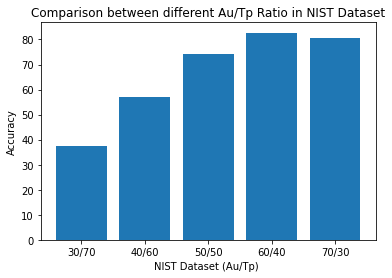

In [12]:
nist_langs = ['30/70', '40/60', '50/50', '60/40', '70/30']
nist_accuracy = [37.27,57.09,74.14,82.71,80.72]
plt.bar(nist_langs,nist_accuracy)
plt.xlabel('NIST Dataset (Au/Tp) ')
plt.ylabel('Accuracy')
plt.title("Comparison between different Au/Tp Ratio in NIST Dataset")
plt.show()

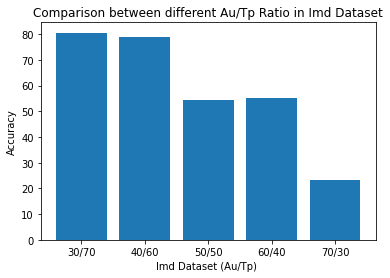

In [13]:
imd_langs = ['30/70', '40/60', '50/50', '60/40', '70/30']
imd_accuracy = [80.60,78.98,54.60,55.14,23.39]
plt.bar(imd_langs,imd_accuracy)
plt.xlabel('Imd Dataset (Au/Tp) ')
plt.ylabel('Accuracy')
plt.title("Comparison between different Au/Tp Ratio in Imd Dataset")
plt.show()

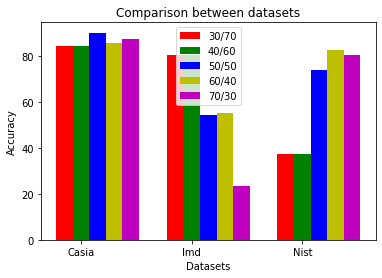

In [14]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.15
Au30Tp70 = [casia_accuracy[0],imd_accuracy[0], nist_accuracy[0]]
bar1 = plt.bar(ind, Au30Tp70, width, color = 'r')
  
Au40Tp60 = [casia_accuracy[1],imd_accuracy[1], nist_accuracy[1]]
bar2 = plt.bar(ind+width, Au30Tp70, width, color='g')
  
Au50Tp50 = [casia_accuracy[2],imd_accuracy[2], nist_accuracy[2]]
bar3 = plt.bar(ind+width*2, Au50Tp50, width, color = 'b')

Aus60Tp40 = [casia_accuracy[3],imd_accuracy[3], nist_accuracy[3]]
bar4 = plt.bar(ind+width*3, Aus60Tp40, width, color = 'y')

Aus70Tp30 =[casia_accuracy[4],imd_accuracy[4], nist_accuracy[4]]
bar5 = plt.bar(ind+width*4, Aus70Tp30, width, color = 'm')
  
plt.xlabel("Datasets")
plt.ylabel('Accuracy')
plt.title("Comparison between datasets")
  
plt.xticks(ind+width,['Casia', 'Imd', 'Nist'])
plt.legend( (bar1, bar2, bar3,bar4,bar5), ('30/70', '40/60', '50/50','60/40','70/30') )
plt.show()

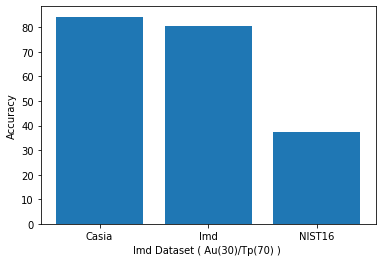

In [5]:
langs = ['Casia', 'Imd', 'NIST16',]
accuracy =[casia_accuracy[0],imd_accuracy[0],nist_accuracy[0]]
plt.bar(langs,accuracy)
plt.xlabel('Imd Dataset ( Au(30)/Tp(70) ) ')
plt.ylabel('Accuracy')
plt.title("Comparison between different Au/Tp Ratio in Casia Dataset")
plt.show()

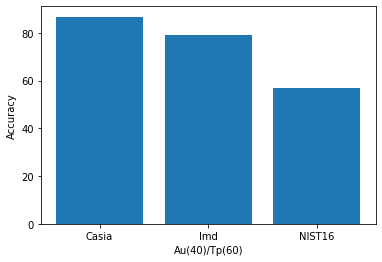

In [6]:
langs = ['Casia', 'Imd', 'NIST16',]
accuracy = [casia_accuracy[1],imd_accuracy[1],nist_accuracy[1]]
plt.bar(langs,accuracy)
plt.xlabel('Au(40)/Tp(60)')
plt.ylabel('Accuracy')
plt.show()

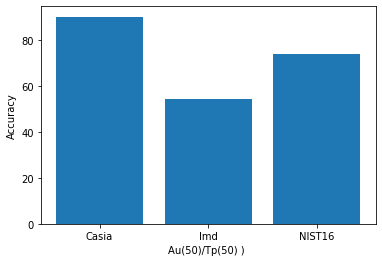

In [7]:
langs = ['Casia', 'Imd', 'NIST16',]
accuracy = [casia_accuracy[2],imd_accuracy[2],nist_accuracy[2]]
plt.bar(langs,accuracy)
plt.xlabel('Au(50)/Tp(50) ) ')
plt.ylabel('Accuracy')
plt.show()

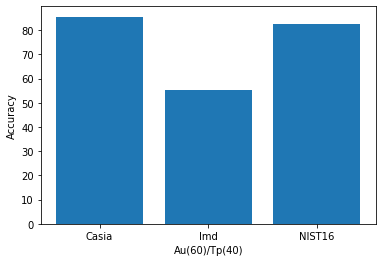

In [8]:
langs = ['Casia', 'Imd', 'NIST16',]
accuracy = [casia_accuracy[3],imd_accuracy[3],nist_accuracy[3]]
plt.bar(langs,accuracy)
plt.xlabel('Au(60)/Tp(40)')
plt.ylabel('Accuracy')
plt.show()

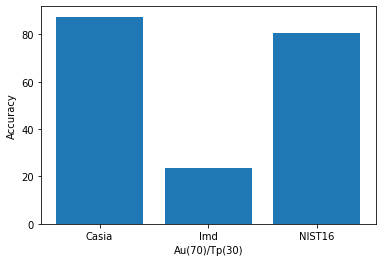

In [9]:
langs = ['Casia', 'Imd', 'NIST16',]
accuracy = [casia_accuracy[4],imd_accuracy[4],nist_accuracy[4]]
plt.bar(langs,accuracy)
plt.xlabel('Au(70)/Tp(30)')
plt.ylabel('Accuracy')
plt.show()

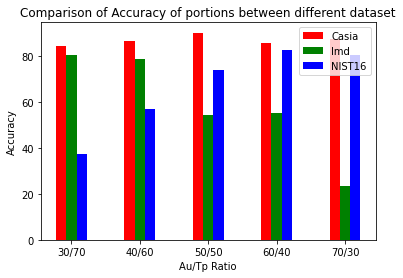

In [10]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.15
xvals3070 = casia_accuracy
bar1 = plt.bar(ind, xvals3070, width, color = 'r')
  
yvals = imd_accuracy
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = nist_accuracy
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Au/Tp Ratio")
plt.ylabel('Accuracy')
plt.title("Comparison of Accuracy of portions between different dataset")
  
plt.xticks(ind+width,['30/70' , '40/60' , '50/50' , '60/40',  '70/30' ])
plt.legend( (bar1, bar2, bar3), ('Casia', 'Imd', 'NIST16') )
plt.show()